##**Καπαρού Αλεξάνδρα 03117100**

#2<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ
##Ανάλυση Κοινωνικής Δομής σε Τεχνητές και Πραγματικές Σύνθετες Τοπολογίες Δικτύων


<p style=text-align:justify>Στην παρούσα άσκηση θα αναλυθούν τεχνητές και πραγματικές τοπολογίες σύνθετων δικτύων με βάση τις μετρικές που χρησιμοποιήθηκαν στην προηγούμενη άσκηση και κάποιες τεχνικές που έχουν ως στόχο την εύρεση κοινωνικής δομής. Συγκεκριμένα, θα χρησιμοποιηθούν και θα συγκριθούν διάφοροι αλγόριθμοι εντοπισμού κοινοτήτων σε γράφους δικτύων που προκύπτουν από πραγματικά δεδομένα καθώς και στους συνθετικούς γράφους της πρώτης εργαστηριακής άσκησης.</p>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.cluster import SpectralClustering

##Α. Μελέτη πραγματικών τοπολογιών


<p style=text-align:justify>Στο παρόν ερώτημα θα μελετήσετε και θα αποκτήσετε αίσθηση της τοπολογικής δομής πραγματικών δικτύων. Πιο συγκεκριμένα, για τις τοπολογίες που φαίνονται στον <b>πίνακα 1</b>, να βρεθούν και να δειχθούν:</p>
<ol>
    <li>Η κατανομή του βαθμού κόμβου και ο μέσος βαθμός κάθε τοπολογίας.</li>
    <li>Η κατανομή του συντελεστή ομαδοποίησης κόμβου και ο μέσος συντελεστής ομαδοποίησης κάθε τοπολογίας.</li>
    <li>Η κατανομή της κεντρικότητας εγγύτητας και η μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.</li>
</ol>
<p style=text-align:justify>Να συγκριθούν τα αποτελέσματα σε σχέση με αυτά των συνθετικών τοπολογιών. Να χαρακτηρίσετε τον τύπο κάθε μίας από τις πραγματικές τοπολογίες με βάση τους τύπους δικτύων που εξετάστηκαν στην πρώτη εργαστηριακή άσκηση.</p>

<table style=width:100%>
    <caption>Πίνακας <b>1</b>: Πραγματικές τοπολογίες</a></caption>
<tr>
    <th style=text-align:left>Τοπολογία</th>
    <th style=text-align:left>Αρχείο</th>
    <th style=text-align:left>Περιγραφή</th>
</tr>
<tr>
    <td style=text-align:left>American College Football</td>
    <td style=text-align:left><a style=text-decoration:none href='http://www-personal.umich.edu/~mejn/netdata/football.zip'>football.gml</a></td>
    <td style=text-align:left><p style=text-align:justify> The file <b>football.gml</b> contains the network of American football games between Division IA colleges during regular season Fall 2000, as compiled by M. Girvan and M. Newman. The nodes have values that indicate to which conferences they belong.</p>
    </td>
</tr>  
<tr>
    <td style=text-align:left>Game of Thrones - season 5</td>
    <td style=text-align:left><a style=text-decoration:none href='https://networkofthrones.wordpress.com/the-series/season-5/'>GoT</a></td>
    <td style=text-align:left><p style=text-align:justify> The season 5 <b>GoT</b> network represents the interactions between the characters of Game of Thrones in season 5. The season 5 network has 118 nodes (characters) and 394 weighted edges, corresponding to 5,139 interactions. Data can be found here: <a style=text-decoration:none href='https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv'>GoT_data</a></p>
</tr> 
<tr>
    <td style=text-align:left>email-Eu-core</td>
    <td style=text-align:left><a style=text-decoration:none href='https://snap.stanford.edu/data/email-Eu-core.html'>email-eu-core</a></td>
    <td style=text-align:left><p style=text-align:justify> The network <b>email-Eu-core</b> was generated using email data from a large European research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core) and the dataset does not contain incoming messages from or outgoing messages to the rest of the world. The dataset also contains "ground-truth" community memberships of the nodes. Each individual belongs to exactly one of 42 departments at the research institute. </p>
</tr> 
    
</table>

<h4>Παραγωγή συνθετικών τοπολογιών</h4> 
<p>Προσοχή! Τα δίκτυα που θα παράξετε θα πρέπει να είναι συνδεδεμένα.</p>

In [2]:
n=80
d=4
M=300
R=0.25
p=0.3
k=4
seedno=5
random.seed(seedno)

REG = nx.watts_strogatz_graph(n,d,0)
RGER = nx.gnm_random_graph(n, M)
RGG = nx.random_geometric_graph(n, R) 
SF = nx.barabasi_albert_graph(n, d)
SW = nx.watts_strogatz_graph(n, k, p) 

Ελέγχουμε αν τα δίκτυα είναι συνδεδεμένα:

In [3]:
print("Is REG network connected?",nx.is_connected(REG))
print("Is RGER network connected?",nx.is_connected(RGER))
print("Is RGG network connected?",nx.is_connected(RGG))
print("Is SF network connected?",nx.is_connected(SF))
print("Is SW network connected?",nx.is_connected(SW))

Is REG network connected? True
Is RGER network connected? True
Is RGG network connected? True
Is SF network connected? True
Is SW network connected? True


Από όπου βλέπουμε ότι όλες οι συνθετικές τοπολογίες είναι συνδεδεμένες.

###Εισαγωγή και οπτικοποίηση πραγματικών τοπολογιών.

Αρχικά διαβάζουμε το αντίστοιχο αρχείο:

#### Football network

Διαβάζοντας το documentation βλέπουμε ότι το δίκτυο αυτό αποτελείται από κόμβους που αναπαριστούν κολλεγιακές ομάδες ποδοσφαίρου και από ακμές που αναπαριστούν παιχνίδια μεταξύ των δύο ομαδών που συνδέουν.

In [4]:
#football network
football=nx.read_gml(r"football.gml")

Εξετάζουμε αν είναι συνδεδεμένο το δίκτυο:

In [5]:
print("Is football network connected?",nx.is_connected(football))

Is football network connected? True


Οπτικοποίηση της τοπολογίας:

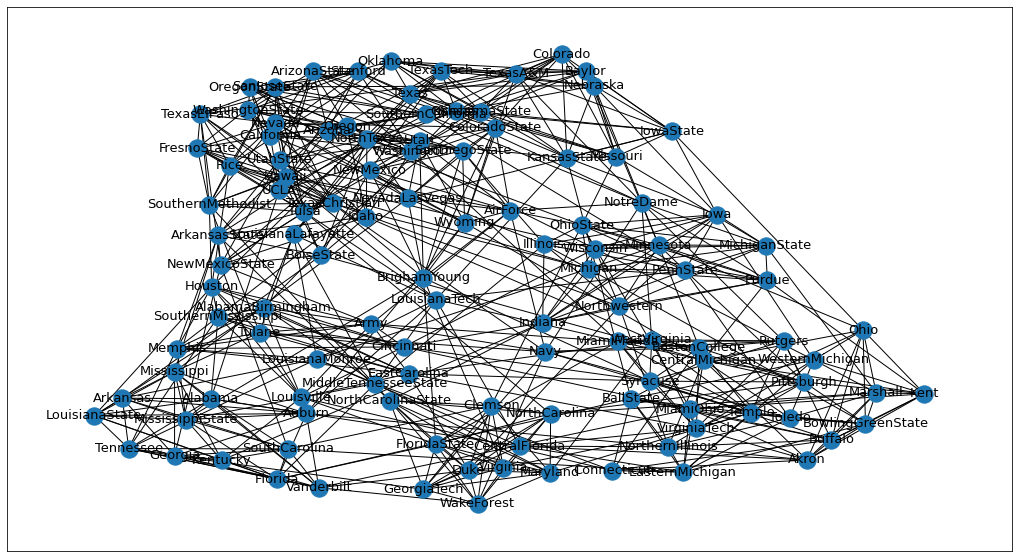

In [6]:
plt.figure(figsize=(18,10)) 
layout=nx.spring_layout(football)
nx.draw_networkx(football, pos=nx.spring_layout(football),font_size=13)
plt.show()

#### Game of thrones network

Διαβάζοντας το documentation του δικτύου βλέπουμε ότι οι κόμβοι αναπαριστούν τους χαρακτήρες της σειράς game of thrones και οι ακμές τις αλληλεπιδράσεις μεταξύ τους.

In [7]:
#Game of thrones network
import csv
got=nx.Graph()
with open('got_s5.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    next(csv_reader)
    for row in csv_reader:
        got.add_edge(row[0],row[1])
        line_count += 1

Εξετάζουμε αν είναι συνδεδεμένο το δίκτυο:

In [8]:
print("Is GOT network connected?",nx.is_connected(got))

Is GOT network connected? True


Οπτικοποίηση της τοπολογίας:

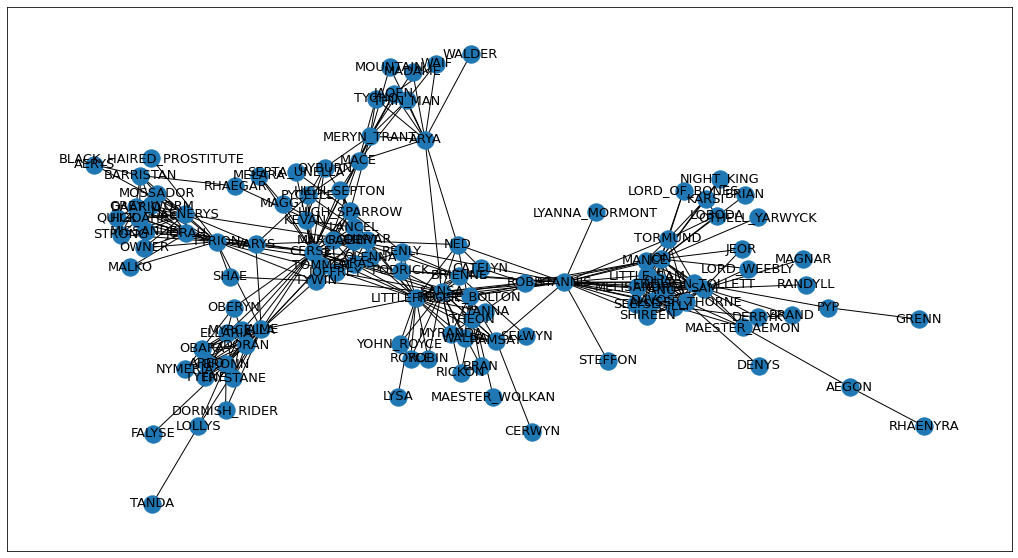

In [9]:
plt.figure(figsize=(18,10)) 
layout=nx.spring_layout(got)
nx.draw_networkx(got, pos=nx.spring_layout(got),font_size=13)
plt.show()

#### Email-Eu-core network

Προσοχή! Θα μελετήσετε τη μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου email-Eu-core, αφού πρώτα αφαιρέσετε τα self-loops. Μπορείτε να κάνετε χρήση των συναρτήσεων connected_components, subgraph, remove_edges_from του networkx.

---

Διαβάζοντας το documentation του δικτύου βλέπουμε ότι αφορά email data. Πιο συγκεκριμένα, οι κόμβοι αναπαριστούν άτομα και οι ακμές (u, v) αναπαριστούν ότι το άτομο u έχιε στείλει στο άτομο v τουλάχιστον ένα email.


In [10]:
#email-Eu-core network
eu=nx.read_edgelist("email-Eu-core.txt",create_using=nx.Graph())

Εξετάζουμε αν είναι συνδεδεμένο το δίκτυο:

In [11]:
print("Is email-Eu-core network network connected?",nx.is_connected(eu))

Is email-Eu-core network network connected? False


Στην συνέχεια κρατάμε την μεγαλύτερη συνδεδεμένη συνιστώσα του δικτύου, αφαιρούμε τα self-loops και δημιουργούμε τον υπογράφο:

In [12]:
#find the maximum connected component
eusorted = max(sorted(nx.connected_components(eu), key=len, reverse=True))
print("The maximum connected component of the graph is:\n", eusorted, "\n")

#make the subgraph
eu_graph = eu.subgraph(eusorted)
eu_graph = nx.Graph(eu_graph) #because we want to unfreeze the graph
print("Graph with self loops:", eu_graph,"\n")

#remove self-loops
eu_graph.remove_edges_from(nx.selfloop_edges(eu_graph))
print("Graph without self loops:", eu_graph)

The maximum connected component of the graph is:
 {'137', '180', '930', '814', '414', '884', '790', '819', '768', '920', '879', '709', '651', '789', '109', '717', '538', '264', '701', '882', '991', '267', '344', '462', '715', '467', '860', '760', '476', '977', '256', '797', '909', '749', '687', '421', '296', '429', '12', '434', '458', '444', '121', '584', '75', '666', '332', '171', '292', '842', '179', '290', '469', '481', '620', '979', '79', '360', '407', '338', '311', '369', '615', '215', '53', '712', '286', '59', '415', '792', '333', '917', '401', '94', '77', '834', '20', '438', '560', '154', '822', '60', '960', '387', '363', '205', '140', '794', '419', '274', '39', '857', '505', '588', '592', '645', '141', '593', '833', '5', '816', '548', '133', '230', '459', '263', '848', '435', '181', '677', '339', '129', '320', '428', '377', '222', '128', '260', '594', '156', '2', '608', '385', '847', '4', '275', '235', '524', '105', '403', '299', '502', '58', '662', '805', '577', '793', '649', 

Οπτικοποίηση της τοπολογίας:

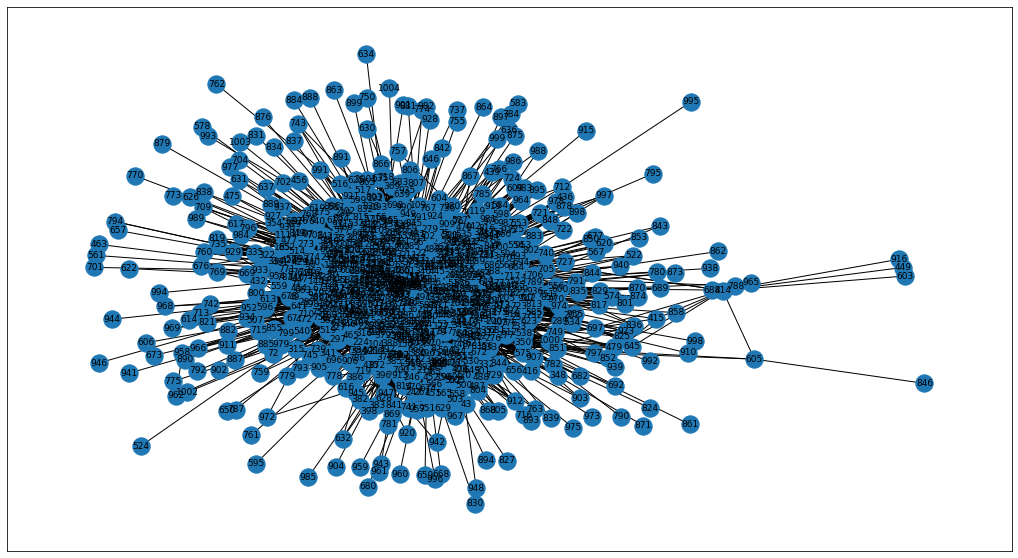

In [13]:
plt.figure(figsize=(18,10)) 
layout=nx.spring_layout(eu_graph)
nx.draw_networkx(eu_graph, pos=nx.spring_layout(eu_graph),font_size=9)
plt.show()

### Μελέτη βαθμού κόμβου για πραγματικές και συνθετικές τοπολογίες.

Αρχικά υπολογίζουμε για κάθε τοπολογία τον μέσο βαθμό κόμβου:

In [14]:
def find_degree(G):
  degrees = []
  for i in G.nodes:
      degrees.append((i,G.degree(i)))
  return degrees
  
def avg_degree(G):
  degree_pairs = find_degree(G)
  x = []
  for i in degree_pairs:
    x.append(i[1])
  mean = np.mean(x)
  return mean

In [15]:
print('\033[4m' +'Football network:' + '\033[0m')
print("The average of degrees is",avg_degree(football),"\n")

print('\033[4m' +'GOT network:' + '\033[0m')
print("The average of degrees is",avg_degree(got),"\n")

print('\033[4m' +'Email-Eu-core network:' + '\033[0m')
print("The average of degrees is",avg_degree(eu_graph),"\n")

print('\033[4m' +'REG network:' + '\033[0m')
print("The average of degrees is",avg_degree(REG),"\n")

print('\033[4m' +'RGER network:' + '\033[0m')
print("The average of degrees is",avg_degree(RGER),"\n")

print('\033[4m' +'RGG network:' + '\033[0m')
print("The average of degrees is",avg_degree(RGG),"\n")

print('\033[4m' +'SF network:' + '\033[0m')
print("The average of degrees is",avg_degree(SF),"\n")

print('\033[4m' +'SW network:' + '\033[0m')
print("The average of degrees is",avg_degree(SW),"\n")

Football network:
The average of degrees is 10.660869565217391 

GOT network:
The average of degrees is 6.65546218487395 

Email-Eu-core network:
The average of degrees is 32.5841784989858 

REG network:
The average of degrees is 4.0 

RGER network:
The average of degrees is 7.5 

RGG network:
The average of degrees is 14.0 

SF network:
The average of degrees is 7.6 

SW network:
The average of degrees is 4.0 



Σε αυτό το σημείο αναπαραστούμε γραφικά την κατανομή του βαθμού κόμβου κάθε τοπολογίας:

In [16]:
def plot_degree_distribution(G, topology):
  x = []
  degree_pairs = find_degree(G)
  for i in degree_pairs:
    x.append(i[1])
  plt.xlabel("Degree Centrality values")
  plt.ylabel("Number of nodes")
  plt.title("Degree Centrality diagram of %s" %topology)
  plt.hist(x, edgecolor='black', color="indianred")
  plt.show()

#### Πραγματικές τοπολογίες:

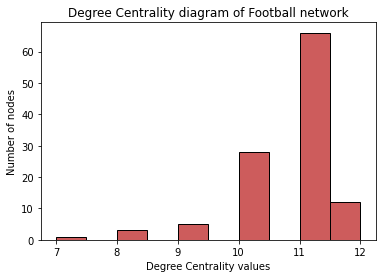

In [17]:
plot_degree_distribution(football, "Football network")

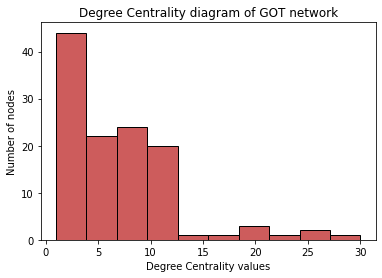

In [18]:
plot_degree_distribution(got, "GOT network")

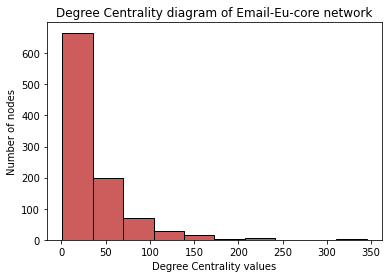

In [19]:
plot_degree_distribution(eu_graph, "Email-Eu-core network")

#### Συνθετικές τοπολογίες:

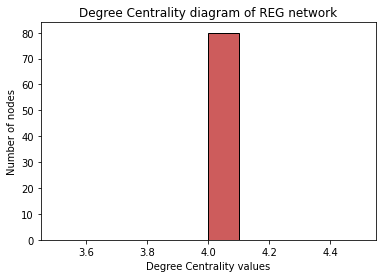

In [20]:
plot_degree_distribution(REG, "REG network")

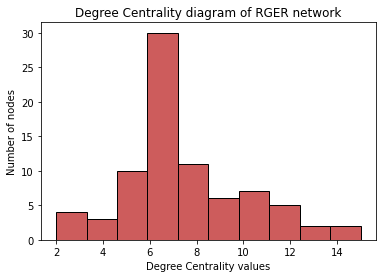

In [21]:
plot_degree_distribution(RGER, "RGER network")

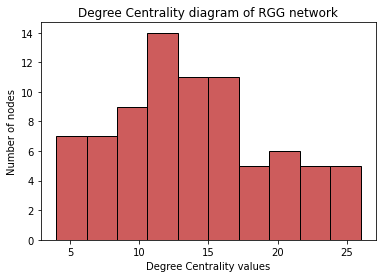

In [22]:
plot_degree_distribution(RGG, "RGG network")

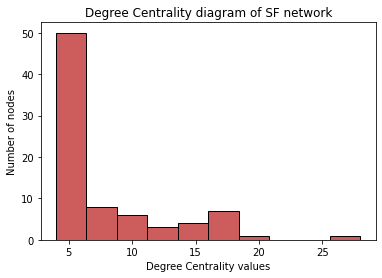

In [23]:
plot_degree_distribution(SF, "SF network")

#### Συμπεράσματα:

Με βάση τα παραπάνω αποτελέσματα προκύπτουν τα κάτωθι αποτελέσματα:
* To δίκτυο football έχει τιμή μέσου βαθμού κοντά στο RGG δίκτυο, ωστόσο η κατανομή του βαθμού δεν ακολουθεί αυτή του RGG αλλά και καμίας από τις γνωστές τοπολογίες. Γνωρίζουμε ότι η τιμή μέσου βαθμού δεν είναι καλό μέτρο σύγκρισης μεταξύ τοπολογιών μιας και το εκάστοτε δίκτυο έχει διαφορετικό πλήθος κόμβων.
* Το δίκτυο GOT έχει τιμή μέσου βαθμού κοντά στο RGER και το SF ενώ η κατανομή του βαθμού μοιάζει λίγο με αυτή της SF αφού έχουμε πολλούς κόμβους με βαθμό μικρότερο του 10 και λίγους κόμβους με βαθμό μεγαλύτερο του 15. Επομένως θεωρούμε ότι μοιάζει με την τοπολογία SF.
* Το δίκτυο Email-Eu-core βλέπουμε ότι πάλι μοιάζει με την τοπολογία SF, πολύ περισσότερο από ότι το δίκτυο GOT. Αυτό φαίνεται από την κατανομή των βαθμών, ωστόσο ο μέσος βαθμός έχει πολύ μεγαλύτερη τιμή από αυτή του SF, κάτι το οποίο είναι αναμενόμενο αφού βλέπουμε από την γραφική ότι υπάρχει και κόμβος με βαθμό μέχρι και 350 ενώ ο SF έχει σαν μέγιστο βαθμό το 30.

### Μελέτη συντελεστή ομαδοποίησης για πραγματικές και συνθετικές τοπολογίες

Αρχικά υπολογίζουμε για κάθε τοπολογία τον μέσο συντελεστή ομαδοποίησης:

In [24]:
print('\033[4m' +'Football network:' + '\033[0m')
print("The average clustering coefficient is",nx.average_clustering(football),"\n")

print('\033[4m' +'GOT network:' + '\033[0m')
print("The average clustering coefficient is",nx.average_clustering(got),"\n")

print('\033[4m' +'Email-Eu-core network:' + '\033[0m')
print("The average clustering coefficient is",nx.average_clustering(eu_graph),"\n")

print('\033[4m' +'REG network:' + '\033[0m')
print("The average clustering coefficient is",nx.average_clustering(REG),"\n")

print('\033[4m' +'RGER network:' + '\033[0m')
print("The average clustering coefficient is",nx.average_clustering(RGER),"\n")

print('\033[4m' +'RGG network:' + '\033[0m')
print("The average clustering coefficient is",nx.average_clustering(RGG),"\n")

print('\033[4m' +'SF network:' + '\033[0m')
print("The average clustering coefficient is",nx.average_clustering(SF),"\n")

print('\033[4m' +'SW network:' + '\033[0m')
print("The average clustering coefficient is",nx.average_clustering(SW),"\n")

Football network:
The average clustering coefficient is 0.40321601104209814 

GOT network:
The average clustering coefficient is 0.5744036387164706 

Email-Eu-core network:
The average clustering coefficient is 0.40705044751953817 

REG network:
The average clustering coefficient is 0.5 

RGER network:
The average clustering coefficient is 0.10780871905871907 

RGG network:
The average clustering coefficient is 0.6889130939729271 

SF network:
The average clustering coefficient is 0.15363123521501998 

SW network:
The average clustering coefficient is 0.19434523809523807 



Σε αυτό το σημείο αναπαραστούμε γραφικά την κατανομή του συντελεστή ομαδοποίησης κόμβου κάθε τοπολογίας:

In [25]:
def plot_distribution_cc(graph, topology):
  dict = nx.clustering(graph)
  cc_list = []
  for i in dict.values():
    cc_list.append(i)
  x = np.sort(cc_list)
  plt.xlabel("Clustering Coefficient values")
  plt.ylabel("Number of nodes")
  plt.title("Clustering Coefficient diagram of %s" %topology)
  plt.hist(x, edgecolor='black', color="indianred")
  plt.show()

#### Πραγματικές τοπολογίες:

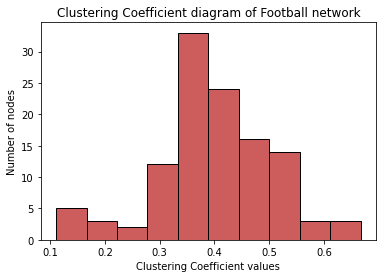

In [26]:
plot_distribution_cc(football, "Football network")

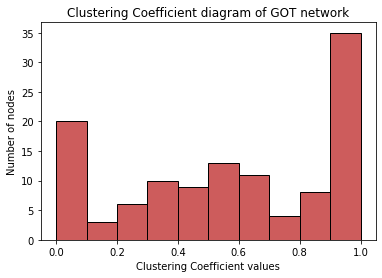

In [27]:
plot_distribution_cc(got, "GOT network")

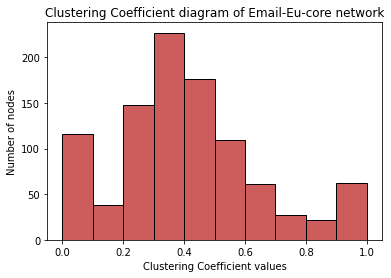

In [28]:
plot_distribution_cc(eu_graph, "Email-Eu-core network")

#### Συνθετικές τοπολογίες:

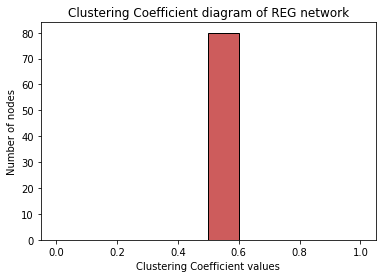

In [29]:
plot_distribution_cc(REG, "REG network")

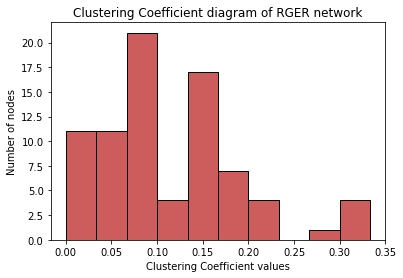

In [30]:
plot_distribution_cc(RGER, "RGER network")

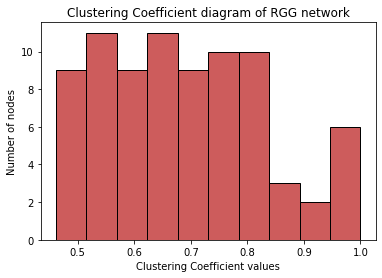

In [31]:
plot_distribution_cc(RGG, "RGG network")

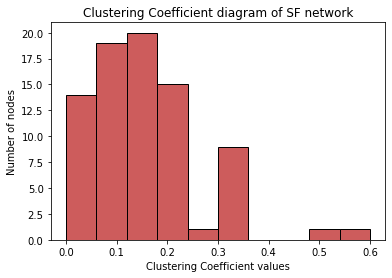

In [32]:
plot_distribution_cc(SF, "SF network")

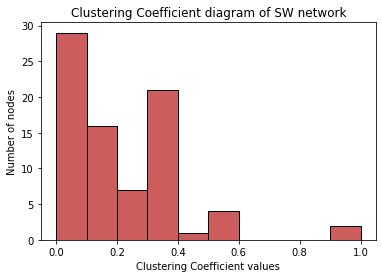

In [33]:
plot_distribution_cc(SW, "SW network")

#### Συμπεράσματα:

Με βάση τα παραπάνω αποτελέσματα προκύπτουν τα κάτωθι αποτελέσματα:
* Όσον αφορά το Football network βλέπουμε ότι έχει μέσο συντελεστή ομαδοποίησης κοντά στο δίκτυο REG αλλά η κατανομή του δεν είναι σταθερή όπως του REG και πλησιάζει την κατανομή του RGG (χωρίς ωστόσο να έχει πολλούς κόμβους με μεγάλο συντελεστή ομαδοποίησης) και του RGER (έχοντας ωστόσο περισσότερους κόμβους με μέσο συντελεστή ομαδοποίησης κοντά στην μέση τιμή).
* Σχετικά με το δίκτυο GOT έχει μέσο συντελεστή ομαδοποίησης κοντά στο RGG αλλά η κατανομή του δεν μοιάζει με καμία συνθετική τοπολογία που έχουμε ήδη μελετήσει μιας και βλέπουμε ότι έχει λίγους κόμβους με συντελεστή ομαδοποίησης κοντά στην μέση τιμή και έχει περισσότερους κόμβους με συντελεστή ομαδοποίησης πολύ μικρό ή πολύ μεγάλο.
* Αναφορικά με το δίκτυο Email-Eu-core παρατηρούμε ότι έχει κατανομή που μοιάζει με του football network και μέσο συντελεστή ομαδοποίησης με παρόμοια τιμή. Σε αυτή την περίπτωση, θα πούμε ότι μοιάζει με την τοπολογία SF. Βέβαια, το γεγονός ότι έχει μεγάλες τιμές συντελεστή ομαδοποίησης μας υποψιάζει ότι θα μπορούσε να είναι και small world μιας και είναι ένα εγγενές χαρακτηριστικό αυτών των δικτύων. Άρα καταλήγουμε ότι θα μπορούσε να είναι SF ή SW.

### Μελέτη κεντρικότητας εγγύτητας για πραγματικές και συνθετικές τοπολογίες 

Αρχικά υπολογίζουμε για κάθε τοπολογία την μέση κεντρικότητα εγγύτητας:

In [34]:
def find_avg_closeness(G):
  dict = nx.closeness_centrality(G)
  cc_list = []
  for i in dict.values():
   cc_list.append(i)
  avg = np.mean(cc_list)
  return avg

In [35]:
print('\033[4m' +'Football network:' + '\033[0m')
print("The average closeness centrality is",find_avg_closeness(football),"\n")

print('\033[4m' +'GOT network:' + '\033[0m')
print("The average closeness centrality is",find_avg_closeness(got),"\n")

print('\033[4m' +'Email-Eu-core network:' + '\033[0m')
print("The average closeness centrality is",find_avg_closeness(eu_graph),"\n")

print('\033[4m' +'REG network:' + '\033[0m')
print("The average closeness centrality is",find_avg_closeness(REG),"\n")

print('\033[4m' +'RGER network:' + '\033[0m')
print("The average closeness centrality is",find_avg_closeness(RGER),"\n")

print('\033[4m' +'RGG network:' + '\033[0m')
print("The average closeness centrality is",find_avg_closeness(RGG),"\n")

print('\033[4m' +'SF network:' + '\033[0m')
print("The average closeness centrality is",find_avg_closeness(SF),"\n")

print('\033[4m' +'SW network:' + '\033[0m')
print("The average closeness centrality is",find_avg_closeness(SW),"\n")

Football network:
The average closeness centrality is 0.39931907825186225 

GOT network:
The average closeness centrality is 0.31905170483140755 

Email-Eu-core network:
The average closeness centrality is 0.39446404120869627 

REG network:
The average closeness centrality is 0.09634146341463413 

RGER network:
The average closeness centrality is 0.42475897842852933 

RGG network:
The average closeness centrality is 0.36365115947647253 

SF network:
The average closeness centrality is 0.4386021576757619 

SW network:
The average closeness centrality is 0.2791959454639716 



Σε αυτό το σημείο αναπαραστούμε γραφικά την κατανομή του συντελεστή ομαδοποίησης κόμβου κάθε τοπολογίας:

In [36]:
def plot_distribution_closeness(graph, topology):
  dict = nx.closeness_centrality(graph)
  cc_list = []
  for i in dict.values():
   cc_list.append(i)
  x = np.sort(cc_list)
  plt.xlabel("Closeness Centrality values")
  plt.ylabel("Number of nodes")
  plt.title("Closeness Centrality diagram of %s" %topology)
  plt.hist(x, edgecolor='black', color="indianred")
  plt.show()

#### Πραγματικές τοπολογίες:

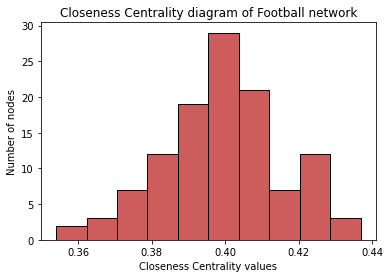

In [37]:
plot_distribution_closeness(football, "Football network")

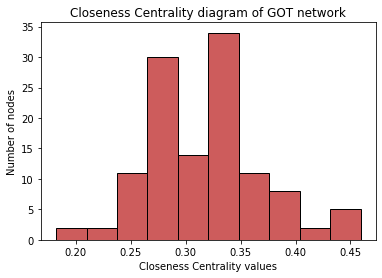

In [38]:
plot_distribution_closeness(got, "GOT network")

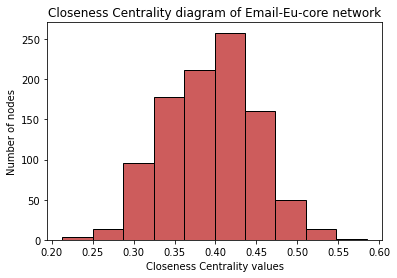

In [39]:
plot_distribution_closeness(eu_graph, "Email-Eu-core network")

#### Συνθετικές τοπολογίες:

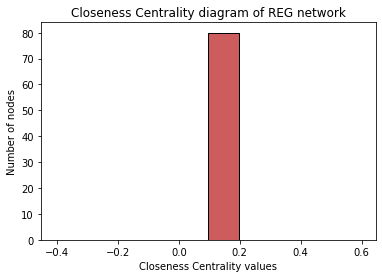

In [40]:
plot_distribution_closeness(REG, "REG network")

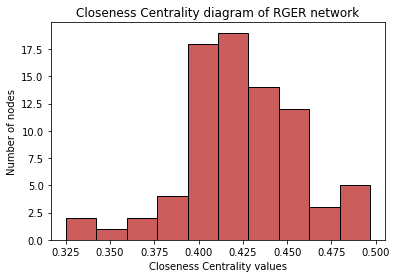

In [41]:
plot_distribution_closeness(RGER, "RGER network")

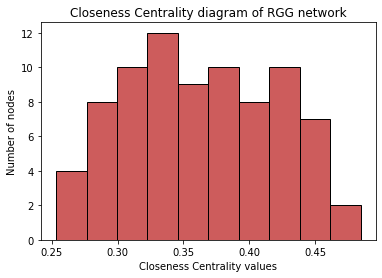

In [42]:
plot_distribution_closeness(RGG, "RGG network")

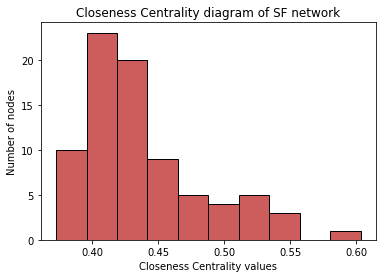

In [43]:
plot_distribution_closeness(SF, "SF network")

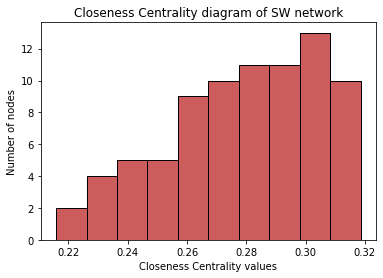

In [44]:
plot_distribution_closeness(SW, "SW network")

#### Συμπεράσματα:

Με βάση τα παραπάνω αποτελέσματα προκύπτουν τα κάτωθι αποτελέσματα:
* Αναφορικά με το δίκτυο football βλέπουμε ότι μοιάζει με την τοπολογία RGER τόσο στην κατανομή όσο και στην μέση κεντρικότητα εγγύτητας.
* Σχετικά με το δίκτυο GOT παρατηρούμε ότι η μέση τιμή κεντρικότητας εγγύτητας είναι κοντα σε αυτές των RGG και SW τοπολογιών. Η κατανομή του ωστόσο μοιάζει μόνο με αυτή της RGER τοπολογίας, με την διαφορά όμως ότι δεν έχει μέγιστο πλήθος κόμβων στην μέση κεντρικότητα εγγύτητας κάθε τοπολογίας.
* Τέλος, όσον αφορά το δίκτυο Email-Eu-core βλέπουμε ότι όπως και προηγουμένως, τόσο η μέση τιμή όσο και η κατανομή είναι σχεδόν ίδια με αυτή του δικτύου football επομένως πάλι βλέπουμε ότι μοιάζει με την τοπολογιά RGER.

### Συνολικά συμπεράσματα:

Από όλα τα παραπάνω συμπεραίνουμε ότι το δίκτυο football μοιάζει με την τοπολογία RGER, το δίκτυο GOT δεν μοιάζει περισσότερο με κάποια συγκεκριμένη τοπολογία μιας και σε κάθε μετρική μοιάζει σε μια διαφορετική, ωστόσο θα θεωρήσουμε ότι μοιάζει με την SF και τέλος, το δίκτυο Email-Eu-core θα θεωρήσουμε ότι είναι τύπου SF ή SW.

##B. Εξοικείωση με τα εργαλεία εντοπισμού κοινοτήτων


<ol>
<li>Χρησιμοποιώντας τις συναρτήσεις του <b>πίνακα 2</b> για κάθε <u>πραγματικό</u> (<b>πίνακας 1</b>) και <u>συνθετικό</u> (από την <b>άσκηση 1</b>) δίκτυο:</p>
<ol>
    <li>να οπτικοποιηθούν οι κοινότητες που προκύπτουν από την κάθε μέθοδο,</li>
    <li>να γίνουν οι απαραίτητοι σχολιασμοί (π.χ: σύγκριση του αριθμού των κοινοτήτων που υπολογίζει ο κάθε αλγόριθμος).</li>
</ol>
<p>Για την οπτικοποίηση, να επισημανθεί διαφορετικά κάθε κοινότητα, π.χ. με διαφορετικό χρώμα.</p>
<p style=text-align:justify>Στην περίπτωση των συνθετικών δικτύων, να πραγματοποιηθούν συγκρίσεις και μεταξύ των διαφορετικών τύπων τοπολογιών. Για παράδειγμα, στην περίπτωση του τυχαίου γεωμετρικού γράφου, υπάρχει διαισθητικά μία κοινότητα γύρω από κάθε κόμβο που δημιουργείται με βάση τις αποστάσεις του τελευταίου από τους υπόλοιπους κόμβους του δικτύου. Στην περίπτωση των scale-free δικτύων, είναι πιθανό να σχηματίζονται κοινότητες γύρω από τους κόμβους με μεγάλο βαθμό.</p>
<li>Για κάθε αλγόριθμο εντοπισμού κοινοτήτων και για κάθε τοπολογία αξιολογήστε την ποιότητα της διαμέρισης με τις μετρικές performance και modularity (<a style=text-decoration:none href='https://networkx.org/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.quality'>measuring_partitions</a>). Για την μετρική performance, θα χρησιμοποιήσετε την συνάρτηση partition_quality του networkx.</li>
<li>Για την μεγαλύτερη συνδεδεμένη συνιστώσα του email-Eu-core, να συγκρίνετε την ground-truth διαμέριση που δίνεται στο αρχείο Email-Eu-core-department-labels.txt με τις διαμερίσεις που προκύπτουν από τις εξεταζόμενες μεθόδους ως προς το πλήθος των παραγόμενων κοινοτήτων και ως προς τις μετρικές performance και modularity. </li>
<li>Για την παρακολούθηση του χρόνου εκτέλεσης της υλοποίησής σας, μπορείτε να χρησιμοποιήσετε την βιβλιοθήκη <a style=text-decoration:none href='https://tqdm.github.io/'>tqdm</a>. Στο σχολιασμό σας να λάβετε υπόψη το trade-off της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης των εξεταζόμενων αλγορίθμων. </li>
</ol>

<table style=float:left;width:70%>
    <caption>Πίνακας <b>2</b>: Συναρτήσεις εντοπισμού κοινοτήτων</caption>
    <tr>
        <th style=text-align:left> Μέθοδος εντοπισμού κοινοτήτων</th>
        <th style=text-align:left>Συνάρτηση</th>
    </tr>
    <tr>
        <td style=text-align:left>Spectral Clustering</td>
        <td style=text-align:left><a style=text-decoration:none href='http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html'>SpectralClustering</a></td>
    </tr>
       <tr>
        <td style=text-align:left>Newman-Girvan</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html'>girvan_newman</a></td>
    </tr>
    <tr>
        <td style=text-align:left>Modularity Maximization</td>
        <td style=text-align:left><a style=text-decoration:none                               href='https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.community.modularity_max.greedy_modularity_communities.html'>greedy_modularity_communities</a></td>
    </tr>
</table>
    

<p style=text-align:justify>Προτού εφαρμόσετε τις συναρτήσεις εντοπισμού κοινοτήτων μελετήστε προσεκτικά την <b>είσοδο που απαιτούν καθώς και τη μορφή εξόδου που παράγουν.</b></p>

In [45]:
#Χρησιμοποιήστε την συνάρτηση conv2int για να μετατρέψετε τα labels των κόμβων στις πραγματικές τοπολογίες σε integers
def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G,first_label=start_value)
    G_mapping=dict(enumerate(G.nodes,0))
    return nG,G_mapping

Επειδή τα labels των κόμβων των δικτύων είναι strings και όχι ints, αρχικά τα μετατρέπουμε σε ints με χρήση της παραπάνω συνάρτησης:

In [46]:
nfootball,football_map = conv2int(football,0)
ngot, got_map = conv2int(got,0)
neu, eu_map = conv2int(eu_graph,0)

### Οπτικοποίηση

Στην συνέχεια οπτικοποιούμε ξανά τις πραγματικές τοπολογίες:

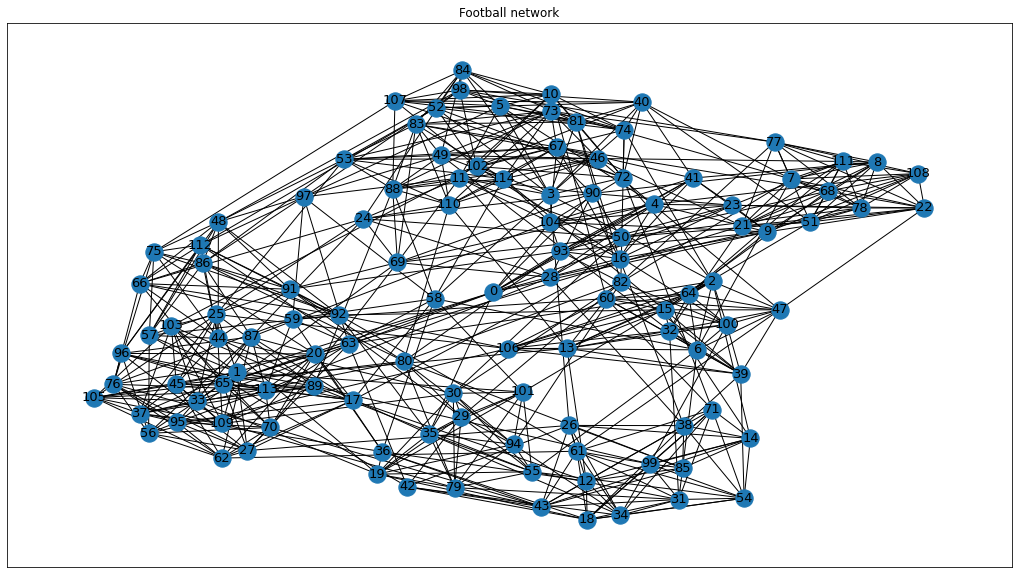

In [47]:
plt.figure(figsize=(18,10)) 
layout=nx.spring_layout(nfootball)
nx.draw_networkx(nfootball, pos=nx.spring_layout(nfootball),font_size=13)
plt.title("Football network")
plt.show()

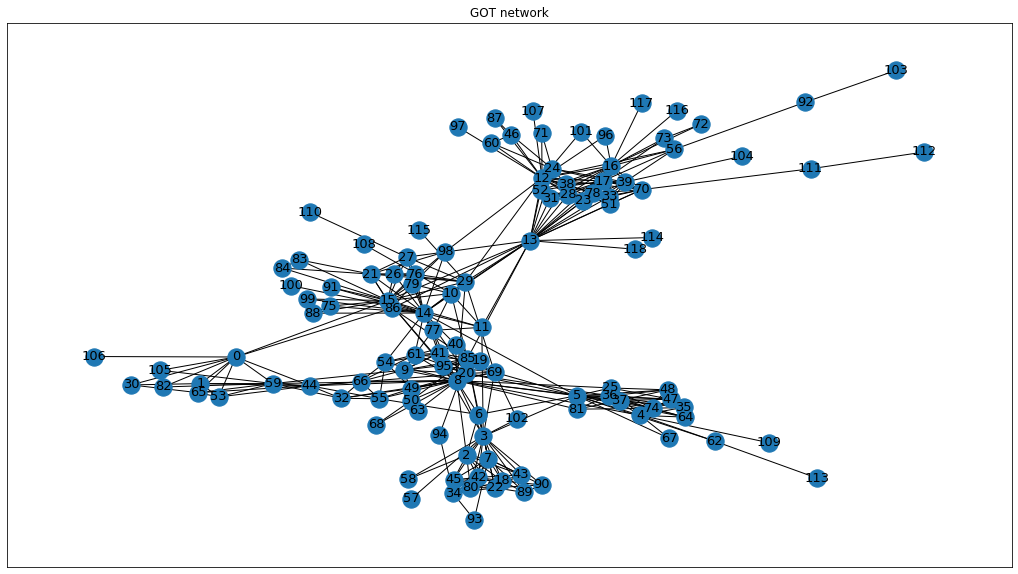

In [48]:
plt.figure(figsize=(18,10)) 
layout=nx.spring_layout(ngot)
nx.draw_networkx(ngot, pos=nx.spring_layout(ngot),font_size=13)
plt.title("GOT network")
plt.show()

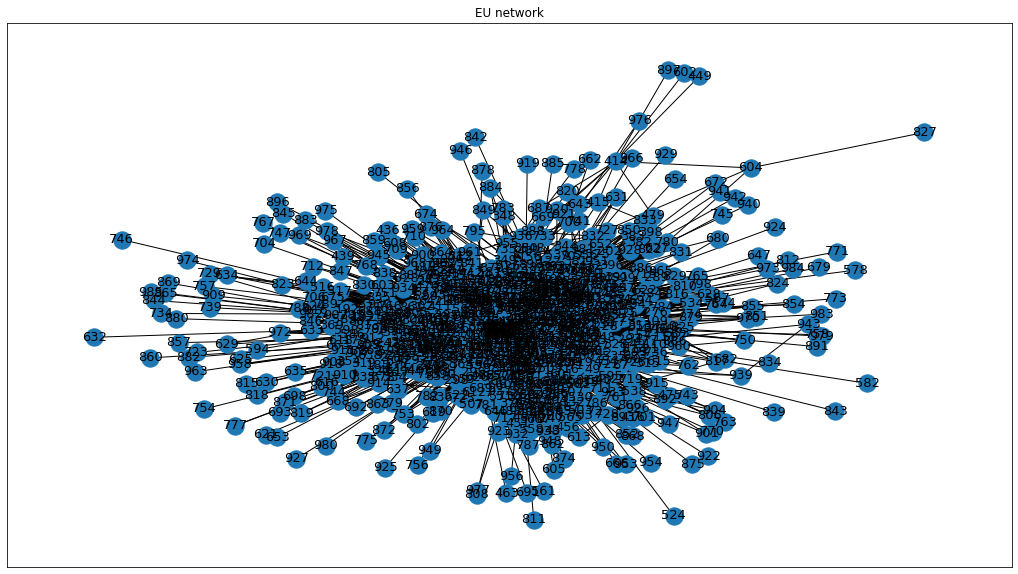

In [49]:
plt.figure(figsize=(18,10)) 
layout=nx.spring_layout(neu)
nx.draw_networkx(neu, pos=nx.spring_layout(neu),font_size=13)
plt.title("EU network")
plt.show()

<h4> Ορισμός χρωμάτων για την οπτικοποίηση των κοινοτήτων.</h4>

In [50]:
#insert colors for nodes
from matplotlib import colors as mcolors
colors = list(dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS).keys())

###Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Newman-Girvan.


<p>Παράξτε τις διαμερίσεις που προκύπτουν από την μέθοδο Newman-Girvan με την αφαίρεση το πολύ 50 ακμών.</p> 
<p> Επιλέξτε τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>



---

O αλγόριθμος Girvan Newman εντοπίζει τις κοινότητες σε μία τοπολογία αφαιρώντας ακμές με την υψηλότερη τιμή ενδιαμεσικότητας (betweenness), μέχρι να μην υάρχουν άλλες ακμές. Η ενδιαμεσικότητα ορίζεται ως ο αριθμός των μικρότερων μονοπατιών ανάμεσα σε ζευγάρια κόμβων που διέρχονται από αυτά. Ο αλγόριθμος ορίζεται ως εξής:


1.   Υπολογισμός της ενδιαμεσικότητας όλων των ακμών του γράφου
2.   Αφαίρεση των ακμών με την μέγιστη ενδιαμεσικότητα
3.   Επαναϋπολογισμός της ενδιαμεσικότητας των ακμών οι οποίες επηρεάστηκαν από την αφαίρεση ακμών του βήματος 3
4.   Επανάληψη των παραπάνω βημάτων μέχρι να μην υπάρχουν άλλες ακμές





Μας ζητήθηκε να επιλέξουμε τις διαμερίσεις με 1) το μεγαλύτερο ***modularity score*** και 2) το μεγαλύτερο ***performance score***.

#### Μεγαλύτερο modularity score:

In [51]:
import itertools
from tqdm import tqdm
from tqdm.notebook import tqdm_notebook

def community_detection_NG_ms(G, k): #here our max k is 50 
  max_modularity = 0
  final_communities = None
  optimized_k = 0
  comp = nx.algorithms.community.centrality.girvan_newman(G)
  #to stop getting tuples of communities once the number of communities is greater than k
  limited = itertools.takewhile(lambda c: len(c) <= k, comp)

  #enumerate the list so that we can decide on the best modularity score
  for j in tqdm_notebook(range(2, k+1), desc = 'Progress bar to find the optimum k' ):
   for i,communities in enumerate(limited):
      modularity = nx.algorithms.community.quality.modularity(G, communities)
      if (max_modularity < modularity):
        max_modularity = modularity
        final_communities = communities
        optimized_k = i+2  #because the minimal value of k is 2 (ie split in 2 communities)

  print("\nOptimal k =", optimized_k, ", Best modularity =", max_modularity)
  print("The communities are:")
  print(tuple(sorted(c) for c in final_communities),"\n")

  return tuple(sorted(c) for c in final_communities), max_modularity

In [52]:
print('\033[4m' +'Πραγματικές τοπολογίες:' + '\033[0m')
print("\n")

print('\033[4m' +'Football network:' + '\033[0m')
footbal_NG_ms, footbal_NG_ms_modularity = community_detection_NG_ms(nfootball, 50)

print('\033[4m' +'GOT network:' + '\033[0m')
got_NG_ms, got_NG_ms_modularity = community_detection_NG_ms(ngot, 50)

print('\033[4m' +'EU network:' + '\033[0m')
eu_NG_ms, eu_NG_ms_modularity = community_detection_NG_ms(neu, 50)

Πραγματικές τοπολογίες:


Football network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]


Optimal k = 10 , Best modularity = 0.5996290274077957
The communities are:
([0, 4, 7, 8, 9, 16, 21, 22, 23, 41, 51, 68, 77, 78, 93, 104, 108, 111], [1, 25, 33, 37, 45, 89, 103, 105, 109], [2, 6, 13, 15, 32, 39, 47, 60, 64, 100, 106], [3, 5, 10, 40, 52, 72, 74, 81, 82, 84, 98, 102, 107], [11, 24, 28, 50, 69, 90], [12, 14, 18, 26, 31, 34, 36, 38, 42, 43, 54, 61, 71, 85, 99], [17, 20, 27, 56, 58, 59, 62, 63, 65, 70, 76, 87, 95, 96, 97, 113], [19, 29, 30, 35, 55, 79, 80, 94, 101], [44, 48, 57, 66, 75, 86, 91, 92, 112], [46, 49, 53, 67, 73, 83, 88, 110, 114]) 

GOT network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]


Optimal k = 8 , Best modularity = 0.6681205999387817
The communities are:
([0, 1, 30, 44, 53, 59, 65, 82, 105, 106], [2, 3, 7, 18, 22, 34, 42, 43, 45, 57, 58, 80, 89, 90, 93, 94, 102], [4, 5, 25, 35, 36, 37, 47, 48, 62, 64, 67, 74, 81, 109, 113], [6, 8, 9, 19, 20, 32, 40, 41, 49, 50, 54, 55, 61, 63, 66, 68, 69, 85, 95], [10, 11, 14, 15, 21, 26, 27, 29, 75, 76, 77, 79, 83, 84, 86, 88, 91, 98, 99, 100, 108, 110, 115], [12, 13, 16, 17, 23, 24, 28, 31, 33, 38, 39, 46, 51, 52, 56, 60, 70, 71, 72, 73, 78, 87, 96, 97, 101, 104, 107, 114, 116, 117, 118], [92, 103], [111, 112]) 

EU network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]


Optimal k = 2 , Best modularity = 0.0006218821799455388
The communities are:
([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 

In [53]:
print('\033[4m' +'Συνθετικές τοπολογίες:' + '\033[0m')
print("\n")

print('\033[4m' +'REG network:' + '\033[0m')
REG_NG_ms, REG_NG_ms_modularity = community_detection_NG_ms(REG, 50)

print('\033[4m' +'RGER network:' + '\033[0m')
RGER_NG_ms, RGER_NG_ms_modularity = community_detection_NG_ms(RGER, 50)

print('\033[4m' +'RGG network:' + '\033[0m')
RGG_NG_ms, RGG_NG_ms_modularity = community_detection_NG_ms(RGG, 50)

print('\033[4m' +'SW network:' + '\033[0m')
SW_NG_ms, SW_NG_ms_modularity = community_detection_NG_ms(SW, 50)

print('\033[4m' +'SF network:' + '\033[0m')
SF_NG_ms, SF_NG_ms_modularity = community_detection_NG_ms(SF, 50)

Συνθετικές τοπολογίες:


REG network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]


Optimal k = 8 , Best modularity = 0.7249999999999999
The communities are:
([0, 1, 2, 3, 74, 75, 76, 77, 78, 79], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [34, 35, 36, 37, 38, 39, 40, 41, 42, 43], [44, 45, 46, 47, 48, 49, 50, 51, 52, 53], [54, 55, 56, 57, 58, 59, 60, 61, 62, 63], [64, 65, 66, 67, 68, 69, 70, 71, 72, 73]) 

RGER network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]


Optimal k = 25 , Best modularity = 0.2237111111111111
The communities are:
([0, 4, 11, 25, 44, 48, 54, 61, 70, 73], [1, 10, 16, 19, 34, 36, 39, 40, 45, 46, 50, 55, 60, 62, 68], [2, 15], [3, 71], [5, 23, 27], [6, 21, 53], [7, 31, 35], [8, 33, 38, 51, 79], [9, 12, 20, 30, 37, 47, 49, 58, 59, 76], [13, 41], [14], [17, 66, 77], [18, 67], [22, 26, 65], [24, 69], [28, 78], [29], [32], [42, 63], [43, 74], [52, 72], [56], [57], [64], [75]) 

RGG network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]


Optimal k = 5 , Best modularity = 0.48454878826530606
The communities are:
([0, 1, 3, 7, 8, 9, 10, 11, 13, 16, 20, 21, 22, 23, 26, 29, 30, 32, 36, 40, 47, 49, 50, 52, 54, 61, 62, 63, 64, 68, 72, 73, 75, 78], [2, 5, 14, 27, 28, 31, 35, 46, 48, 57, 58, 65, 66, 76, 79], [4, 6, 12, 15, 24, 37, 39, 44, 51, 53, 55, 59, 60, 69, 71], [17, 18, 19, 25, 33, 34, 38, 41, 43, 45, 56, 74], [42, 67, 70, 77]) 

SW network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]


Optimal k = 8 , Best modularity = 0.5790039062500001
The communities are:
([0, 1, 2, 7, 8, 9, 10, 11, 13, 74, 75, 76, 77, 78, 79], [3, 4, 5, 6, 58, 59, 60, 61, 62, 63, 64, 73], [12, 14, 15, 16, 17, 18, 19], [20, 24, 25, 26, 27, 42, 52, 72], [21, 22, 36, 37, 38, 39, 40, 53], [23, 41, 43, 44, 45, 46, 47, 48], [28, 29, 30, 31, 32, 33, 34, 35, 49], [50, 51, 54, 55, 56, 57, 65, 66, 67, 68, 69, 70, 71]) 

SF network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]


Optimal k = 25 , Best modularity = 0.1305131146121883
The communities are:
([0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 26, 27, 30, 31, 32, 33, 35, 36, 40, 43, 50, 53, 56, 65, 69, 70, 73], [1, 20, 41, 60, 63], [2, 25, 57, 79], [24, 29], [28, 48], [34, 38], [37, 58], [39], [42, 71], [44], [45, 46], [47, 49], [51], [52, 74], [54, 78], [55, 72], [59], [61, 66], [62], [64], [67], [68], [75], [76], [77]) 



#### Μεγαλύτερο performance score:

In [54]:
def community_detection_NG_ps(G, k): #here our max k is 50 
  max_performance = 0
  final_communities = None
  optimized_k = 0
  comp = nx.algorithms.community.centrality.girvan_newman(G)
  #to stop getting tuples of communities once the number of communities is greater than k
  limited = itertools.takewhile(lambda c: len(c) <= k, comp)

  #enumerate the list so that we can decide on the best modularity score
  for j in tqdm_notebook(range(2, k+1), desc = 'Progress bar to find the optimum k' ):
   for i,communities in enumerate(limited):
    coverage,performance = nx.algorithms.community.quality.partition_quality(G, communities)
    if (max_performance < performance):
      max_performance = performance
      final_communities = communities
      optimized_k = i+2  #because the minimal value of k is 2 (ie split in 2 communities)

  print("Optimal k =", optimized_k, ", Best performance =", max_performance)
  print("The communities are:")
  print(tuple(sorted(c) for c in final_communities),"\n")

  return tuple(sorted(c) for c in final_communities), max_performance

In [55]:
print('\033[4m' +'Πραγματικές τοπολογίες:' + '\033[0m')
print("\n")

print('\033[4m' +'Football network:' + '\033[0m')
football_NG_ps, football_NG_ps_performance = community_detection_NG_ps(nfootball, 50)

print('\033[4m' +'GOT network:' + '\033[0m')
got_NG_ps, got_NG_ps_performance = community_detection_NG_ps(ngot, 50)

print('\033[4m' +'EU network:' + '\033[0m')
eu_NG_ps, eu_NG_ps_performance = community_detection_NG_ps(neu, 50)

Πραγματικές τοπολογίες:


Football network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 17 , Best performance = 0.9581998474446987
The communities are:
([0, 4, 9, 16, 23, 41, 93, 104], [1, 25, 33, 37, 45, 89, 103, 105, 109], [2, 6, 13, 15, 32, 39, 47, 60, 64, 100, 106], [3, 5, 10, 40, 52, 72, 74, 81, 84, 98, 102, 107], [7, 8, 21, 22, 51, 68, 77, 78, 108, 111], [11, 24, 28, 50, 69, 90], [12, 14, 26, 38, 43, 85], [17, 20, 27, 56, 62, 65, 70, 76, 87, 95, 96, 113], [18, 31, 34, 54, 61, 71, 99], [19, 29, 30, 35, 55, 79, 94, 101], [36], [42], [44, 48, 57, 66, 75, 86, 91, 92, 112], [46, 49, 53, 67, 73, 83, 88, 110, 114], [58, 59, 63, 97], [80], [82]) 

GOT network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 50 , Best performance = 0.96425010682239
The communities are:
([0, 1, 30, 44, 53, 59, 65], [2, 3, 7, 18, 22, 34, 42, 43, 45, 80, 89, 90], [4, 5, 25, 35, 36, 37, 47, 48, 64, 74, 81], [6], [8, 9, 19, 20, 40, 41, 54, 61, 69], [10, 11, 77, 108], [12, 13, 16, 17, 23, 28, 31, 33, 38, 39, 51, 52, 70, 78], [14, 15, 21, 26, 27, 29, 76, 79, 86, 98], [24], [32, 55, 66], [46, 60, 87], [49], [50, 68], [56], [57], [58], [62, 113], [63], [67], [71], [72], [73], [75], [82], [83, 84], [85], [88], [91], [92, 103], [93], [94], [95], [96], [97], [99], [100], [101], [102], [104], [105], [106], [107], [109], [110], [111, 112], [114], [115], [116], [117], [118]) 

EU network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 50 , Best performance = 0.13940548388093205
The communities are:
([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 2

In [56]:
print('\033[4m' +'Συνθετικές τοπολογίες:' + '\033[0m')
print("\n")

print('\033[4m' +'REG network:' + '\033[0m')
REG_NG_ps, REG_NG_ps_performance = community_detection_NG_ps(REG, 50)

print('\033[4m' +'RGER network:' + '\033[0m')
RGER_NG_ps, RGER_NG_ps_performance = community_detection_NG_ps(RGER, 50)

print('\033[4m' +'RGG network:' + '\033[0m')
RGG_NG_ps, RGG_NG_ps_performance = community_detection_NG_ps(RGG, 50)

print('\033[4m' +'SW network:' + '\033[0m')
SW_NG_ps, SW_NG_ps_performance = community_detection_NG_ps(SW, 50)

print('\033[4m' +'SF network:' + '\033[0m')
SF_NG_ps, SF_NG_ps_performance = community_detection_NG_ps(SF, 50)

Συνθετικές τοπολογίες:


REG network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 16 , Best performance = 0.9696202531645569
The communities are:
([0, 1, 2, 3, 79], [4, 5, 6, 7, 8], [9, 10, 11, 12, 13], [14, 15, 16, 17, 18], [19, 20, 21, 22, 23], [24, 25, 26, 27, 28], [29, 30, 31, 32, 33], [34, 35, 36, 37, 38], [39, 40, 41, 42, 43], [44, 45, 46, 47, 48], [49, 50, 51, 52, 53], [54, 55, 56, 57, 58], [59, 60, 61, 62, 63], [64, 65, 66, 67, 68], [69, 70, 71, 72, 73], [74, 75, 76, 77, 78]) 

RGER network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 33 , Best performance = 0.9221518987341772
The communities are:
([0, 44, 48, 54], [1, 45, 46, 50, 55], [2, 15], [3, 71], [4, 11, 25, 61, 73], [5, 23, 27], [6, 21, 53], [7, 31, 35], [8, 33, 38, 51, 79], [9, 58, 76], [10, 34, 60, 62], [12, 37, 59], [13, 41], [14], [16, 19, 36, 68], [17, 66, 77], [18, 67], [20, 30, 47, 49], [22, 26, 65], [24, 69], [28, 78], [29], [32], [39], [40], [42, 63], [43, 74], [52, 72], [56], [57], [64], [70], [75]) 

RGG network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 26 , Best performance = 0.9031645569620254
The communities are:
([0, 1, 9, 10, 11, 16, 20, 22, 23, 29, 36, 40, 49, 50, 54, 61, 62, 64, 68, 75, 78], [2, 5, 14, 27, 28, 31, 35, 48, 58, 76, 79], [3], [4, 12, 24, 37, 39, 44, 51, 55, 59, 60, 69, 71], [6], [7], [8], [13], [15], [17, 18, 25, 33, 34, 38, 41, 43, 45, 56, 74], [19], [21], [26], [30], [32], [42, 67, 70, 77], [46], [47], [52], [53], [57], [63], [65], [66], [72], [73]) 

SW network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 31 , Best performance = 0.9686708860759494
The communities are:
([0, 1, 2, 79], [3, 5], [4, 59], [6], [7], [8, 9, 10, 11], [12, 18, 19], [13], [14, 15, 16, 17], [20, 42, 72], [21, 22], [23, 47, 48], [24, 25, 26], [27, 52], [28, 29, 30, 31], [32, 33, 34], [35], [36, 37, 38], [39, 40, 53], [41], [43, 44, 45, 46], [49], [50, 51], [54], [55, 56, 57], [58, 73], [60, 61, 62, 63, 64], [65, 66, 67, 68], [69, 70, 71], [74, 75, 76], [77, 78]) 

SF network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 49 , Best performance = 0.915506329113924
The communities are:
([0, 4, 5, 7, 9, 12], [1, 20, 41, 60, 63], [2, 25, 57], [3, 6, 14, 17, 33, 70], [8], [10], [11], [13], [15, 26], [16], [18, 31], [19], [21], [22], [23, 32, 50], [24, 29], [27], [28, 48], [30], [34, 38], [35], [36], [37, 58], [39], [40], [42, 71], [43], [44], [45, 46], [47, 49], [51], [52, 74], [53], [54, 78], [55, 72], [56], [59], [61, 66], [62], [64], [65], [67], [68], [69], [73], [75], [76], [77], [79]) 



#### Σχολιασμός

Όσον αφορά την μέθοδο Newman-Girvan, παρατηρούμε τα παρακάτω:

* Σχετικά με τον αριθμό των κοινοτήτων
  
 Παρατηρούμε ότι ανάμεσα στον αριθμό κοινοτήτων που προκύπτουν μεγιστοποιώντας το modularity και αυτών που προκύπτουν μεγιστοποιώντας το performance, ο πρώτος είναι σε κάθε περίπτωση μικρότερος. Αυτό συμβαίνει επειδή το modularity 
είναι ένα μέτρο της δομής του δικτύου το οποίο μετρά την δύναμη διαμέρισης ενός δικτύου σε κοινότητες (modules). Τα δίκτυα με μεγάλο modularity έχουν πυκνές συνδέσεις ανάμεσα σε κόμβους που ανήκουν στην ίδια κοινότητα και αραιές συνδέσεις με κόμβους που ανήκουν σε διαφορετικές κοινότητες. Επομένως για να έχουμε αυξημένο modularity οι διαμερίσεις είναι λιγότερες στα δίκτυα προκειμένου να έχουμε πυκνές συνδέσεις ανάμεσα σε κόμβους μιας κοινότητας. Αναφορικά με το performance αναμένουμε να θέλει μεγαλύτερο αριθμό διαμερίσεων μιας και η απόδοση ορίζεται ως: 

 $\frac{(intra community edges) + (inter community nonedges)}{total number of potential edges}$

 όπου:
  * intra community edges : αριθμός ακμών που ενώνουν κόμβους που ανήκουν στην ίδια κοινότητα
  * inter community non edges : αριθμός ακμών που δεν υπάρχουν και θα ένωναν κόμβους που δεν ανήκουν στην ίδια κοινότητα.

Επομένως, για να αυξηθεί το performance πρέπει να αυξηθεί ο αριθμητής, άρα να αυξηθεί ο αριθμός τον inter community non edges το οποίο γίνεται διαμερίζοντας το δίκτυο σε περισσότερα κομμάτια.

---

* Σχετικά με το μέγιστο modularity

 Παρατηρούμε ότι στις πραγματικές τοπολογίες, τα δίκτυα football και got έχουν παρόμοιες τιμές ενώ το eu network έχει πολύ μικρή τιμή. Με βάση αυτό συμπεραίνουμε ότι το eu network έχει αραιές συνδέσεις ανάμεσα στους κόμβους που ανήκουν στην ίδια κοινότητα και πυκνές συνδέσεις ανάμεσα στους κόμβους που ανήκουν σε διαφορετικές κοινότητες το οποίο θα φανεί αργότερα και στην οπτικοποίηση του δικτύου. Αναφορικά με τις συνθετικές τοπολογίες, το μέγιστο modularity το έχει ο τυχαίος γράφος  και το μικρότερο ο SF το οποίο ήταν αναμενόμενο αφού συνήθως σχηματίζονται κοινότητες γύρω από έναν κόμβο κάθε φορά, έχουμε επομένως αραιές συνδέσεις εσωτερικά της κάθε κοινότητας.

---

* Σχετικά με το μέγιστο performance

Για τις πραγματικές τοπολογίες βλέπουμε ότι την μικρότερη τιμή της μετρικής την έχει πάλι το eu. Αντίστοιχα, για τις συνθετικές τοπολογίες την μέγιστη τιμή την έχει το REG και την ελάχιστη τα RGG, SF. Βλέπουμε δηλαδή ότι υπάρχει μια αντιστοιχία μεταξύ των modularity, performance όπου τοπολογίες έχουν μεγάλο modularity έχουν και μεγάλο performance και αντίθετα. 


---
* Σχετικά με τον χρόνο εκτέλεσης

Για τις πραγματικές τοπολογίες παρατηρούμε ότι τον μικρότερο χρόνο υπολογισμού (τόσο για το max modularity οσο και για το max performance) τον έχει το GOT network και τον μεγαλύτερο το EU network (με πολλή μεγάλη διαφορά). Αναμέναμε αυτά τα αποτελέσματα κυρίως λόγω του πλήθους των κόμβων του κάθε δικτύου, με το GOT network να έχει τους λιγότερους κόμβους (γύρω στους 120) και το EU να έχει πολύ μεγαλύτερο πλήθος κόμβων (986). Για τις συνθετικές τοπολογίες παρατηρούμε παρόμοιους χρόνους εκτέλεσης μιας και έχουμε ίδιο αριθμό κόμβων σε όλες (80) επομένως η διαφορά των χρόνων οφείλεται στην δομή του κάθε γράφου και πώς αυτός επηρεάζει τον υπολογισμό των διαμερίσεων. Κατά την πειραματική εκτέλεση του αλγορίθμου εντοπίσαμε ότι για να βρούμε το μέγιστο modularity ή performance αντίστοιχα, χρειαζόταν περισσότερο χρόνο σε αντίθεση με όταν βρίσκαμε χειρότερο modularity ή performance το οποίο μας οδηγεί στο συμπέρασμα ότι υπάρχει ένα trade-off μεταξύ της ποιότητας της διαμέρισης και του χρόνου εκτέλεσης.

###Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Spectral Clustering.


Προσοχή! Για την επιλογή της τιμής της παραμέτρου που αφορά στην διάσταση του projection subspace (n_clusters) της συνάρτησης SpectralClustering, θα πρέπει να λάβετε υπόψη το μέγεθος |V| του εκάστοτε δικτύου.
<p>Να εξετάσετε τις διαμερίσεις που προκύπτουν για n_clusters$=2,...,|V|$. Να επιλέξετε για οπτικοποίηση τις διαμερίσεις με το 1) μεγαλύτερο modularity score και 2) performance score για κάθε πραγματικό και συνθετικό δίκτυο.</p>

---



Ο αλγόριθμος spectral clustering χρησιμοποιείται ευρύτατα στον εντοπισμό κοινοτήτων σε ένα δίκτυο. Ορίζεται ως εξής:
1. Δημιουργείται ένας γράφος ομοιότητας o οποίος έχει την μορφή ενός πίνακα γειτνίασης
2. Γίνεται προβολή των δεδομένων σε ένα χώρο μικρότερης διάστασης μέσω του υπολογισμού ενός Graph Laplacian Matrix
3. Γίνεται συσταδοποίηση (clustering) των δεδομένων συνήθως με χρήση του αλγορίθμου K-Means Clustering.

Μας ζητήθηκε να επιλέξουμε τις διαμερίσεις με 1) το μεγαλύτερο ***modularity score*** και 2) το μεγαλύτερο ***performance score***.

#### Μεγαλύτερο modularity score:

In [57]:
def community_detection_SC_ms(G, k): #here our max k is 50 

  #get adjacency-matrix as numpy-array
  adj_mat = nx.to_numpy_array(G)
  max_modularity = 0
  final_communities = None
  optimized_k = 0
  sc = None

  for j in tqdm_notebook(range(2, k+1), desc = 'Progress bar to find the optimum k' ):
   for i in range (1, k+1): #we need k as 1<=k<=50
    sc = SpectralClustering(n_clusters = i,affinity = "precomputed").fit(adj_mat)
    communities = []

    for j in np.unique(sc.labels_):
       community = [x for x in range(len(sc.labels_)) if sc.labels_[x]==j]
       communities.append(community)
    modularity = nx.algorithms.community.quality.modularity(G, communities)
    if (max_modularity < modularity):
      max_modularity = modularity
      final_communities = communities
      optimized_k = i+2  #because the minimal value of k is 2 (ie split in 2 communities)

  print("Optimal k =", optimized_k, ", Best modularity =", max_modularity)
  print("The communities are:")
  print(tuple(sorted(c) for c in final_communities),"\n")

  return tuple(sorted(c) for c in final_communities), max_modularity

In [58]:
print('\033[4m' +'Πραγματικές τοπολογίες:' + '\033[0m')
print("\n")

print('\033[4m' +'Football network:' + '\033[0m')
football_SC_ms, football_SC_ms_modularity = community_detection_SC_ms(nfootball, 50)

print('\033[4m' +'GOT network:' + '\033[0m')
got_SC_ms, got_SC_ms_modularity = community_detection_SC_ms(ngot, 50)

print('\033[4m' +'EU network:' + '\033[0m')
eu_SC_ms, eu_SC_ms_modularity = community_detection_SC_ms(neu, 50)

Πραγματικές τοπολογίες:


Football network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 13 , Best modularity = 0.6022010863056825
The communities are:
([12, 14, 18, 26, 31, 34, 36, 38, 42, 43, 54, 61, 71, 85, 99], [17, 20, 27, 56, 58, 59, 62, 63, 65, 70, 76, 87, 95, 96, 113], [7, 8, 21, 22, 51, 68, 77, 78, 108, 111], [1, 25, 33, 37, 45, 89, 103, 105, 109], [3, 5, 10, 40, 52, 72, 74, 81, 84, 98, 102, 107], [19, 29, 30, 35, 55, 79, 80, 82, 94, 101], [0, 4, 9, 16, 23, 41, 93, 104], [46, 49, 53, 67, 73, 83, 88, 110, 114], [44, 48, 57, 66, 75, 86, 91, 92, 97, 112], [2, 6, 13, 15, 32, 39, 47, 60, 64, 100, 106], [11, 24, 28, 50, 69, 90]) 

GOT network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 9 , Best modularity = 0.665416794204673
The communities are:
([12, 13, 16, 17, 23, 24, 28, 31, 33, 38, 39, 46, 51, 52, 56, 60, 70, 71, 72, 73, 78, 87, 96, 97, 101, 104, 107, 111, 112, 114, 116, 117, 118], [10, 11, 14, 15, 21, 26, 27, 29, 75, 76, 79, 83, 84, 86, 88, 91, 98, 99, 100, 108, 110, 115], [0, 1, 30, 44, 53, 59, 65, 82, 105, 106], [92, 103], [2, 3, 7, 18, 22, 34, 42, 43, 45, 57, 58, 80, 89, 90, 93, 94], [4, 5, 25, 35, 36, 37, 47, 48, 62, 64, 67, 74, 81, 109, 113], [6, 8, 9, 19, 20, 32, 40, 41, 49, 50, 54, 55, 61, 63, 66, 68, 69, 77, 85, 95, 102]) 

EU network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 13 , Best modularity = 0.3830767799692663
The communities are:
([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 47, 48, 75, 76, 96, 113, 114, 115, 116, 119, 123, 135, 136, 151, 165, 170, 171, 229, 245, 251, 261, 263, 318, 336, 337, 338, 339, 361, 367, 370, 417, 423, 436, 437, 438, 439, 442, 443, 444, 455, 464, 470, 485, 527, 545, 547, 587, 589, 608, 651, 709, 710, 712, 713, 737, 741, 768, 778, 797, 825, 828, 841, 856, 859, 862, 864, 876, 878, 881, 895, 896, 900, 906, 934, 945, 957, 959, 961, 962, 964, 967, 968, 969, 978], [414, 415, 449, 602, 604, 827, 897], [0, 1, 5, 10, 13, 16, 17, 18, 20, 21, 22, 42, 46, 49, 50, 62, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 90, 91, 92, 105, 106, 107, 108, 109, 110, 111, 112, 117, 118, 120, 121, 127, 133, 134, 142, 143, 144, 145, 146, 147, 152, 153, 154, 155, 160, 162, 163, 166, 169, 173, 177, 183, 184, 186, 187, 188, 189, 190, 209, 210, 211, 212, 215, 217, 218, 219, 220, 

In [59]:
print('\033[4m' +'Συνθετικές τοπολογίες:' + '\033[0m')
print("\n")

print('\033[4m' +'REG network:' + '\033[0m')
REG_SC_ms, REG_SC_ms_modularity = community_detection_SC_ms(REG, 50)

print('\033[4m' +'RGER network:' + '\033[0m')
RGER_SC_ms, RGER_SC_ms_modularity = community_detection_SC_ms(RGER, 50)

print('\033[4m' +'RGG network:' + '\033[0m')
RGG_SC_ms, RGG_SC_ms_modularity = community_detection_SC_ms(RGG, 50)

print('\033[4m' +'SW network:' + '\033[0m')
SW_SC_ms, SW_SC_ms_modularity = community_detection_SC_ms(SW, 50)

print('\033[4m' +'SF network:' + '\033[0m')
SF_SC_ms, SF_SC_modularity = community_detection_SC_ms(SF, 50)

Συνθετικές τοπολογίες:


REG network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 9 , Best modularity = 0.7256250000000001
The communities are:
([57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67], [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], [68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 79], [46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]) 

RGER network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 11 , Best modularity = 0.2985111111111111
The communities are:
([4, 7, 10, 11, 13, 14, 16, 25, 31, 35, 40, 42, 66, 70, 71], [22, 26, 65, 75], [0, 3, 9, 12, 15, 37, 41, 48, 54, 58, 59, 64, 67, 73, 76], [8, 33, 38, 51, 79], [19, 20, 24, 30, 36, 44, 47, 49, 52, 61, 68, 69, 72], [2, 6, 18, 21, 29, 32, 53, 56, 63], [43, 74, 78], [5, 17, 23, 27, 62, 77], [1, 28, 34, 39, 45, 46, 50, 55, 57, 60]) 

RGG network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 6 , Best modularity = 0.4808816964285715
The communities are:
([2, 5, 14, 27, 28, 31, 35, 46, 48, 57, 58, 65, 66, 76, 79], [0, 1, 3, 7, 8, 9, 10, 11, 13, 16, 20, 21, 22, 23, 26, 29, 30, 32, 36, 40, 47, 49, 50, 52, 54, 56, 61, 62, 63, 64, 68, 70, 73, 75, 77, 78], [17, 18, 19, 25, 33, 34, 38, 41, 43, 45, 74], [4, 6, 12, 15, 24, 37, 39, 42, 44, 51, 53, 55, 59, 60, 67, 69, 71, 72]) 

SW network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 10 , Best modularity = 0.5748437500000001
The communities are:
([27, 28, 29, 30, 31, 56], [12, 14, 15, 16, 17, 18, 19], [7, 8, 9, 10, 11, 74, 75, 76, 77, 78], [21, 22, 23, 49, 50, 51, 52, 53, 54, 55, 57, 65, 66, 67, 68, 69, 70, 71], [20, 24, 25, 26, 42, 72], [3, 4, 5, 6, 58, 59, 60, 61, 62, 63, 64, 73], [32, 33, 34, 35, 36, 37, 38, 39, 40], [0, 1, 2, 13, 41, 43, 44, 45, 46, 47, 48, 79]) 

SF network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 12 , Best modularity = 0.2625735803324099
The communities are:
([28, 61, 66, 79], [12, 26, 34, 38, 39, 71], [1, 20, 41, 52, 63, 67, 74], [10, 11, 17, 18, 27, 30, 31, 37, 42, 51, 53, 73, 75, 77], [13, 14, 19, 22, 36, 48, 62, 64, 72, 76], [2, 25, 57, 59, 60], [0, 3, 4, 5, 6, 7, 8, 9, 29, 33, 40, 43, 44, 55, 56, 65, 68, 69, 70], [15, 16, 24, 35, 54, 78], [23, 32, 45, 46, 50], [21, 47, 49, 58]) 



#### Μεγαλύτερο performance score:

In [60]:
def community_detection_SC_ps(G, k): #here our max k is 50 

  #get adjacency-matrix as numpy-array
  adj_mat = nx.to_numpy_array(G)
  max_performance = 0
  final_communities = None
  optimized_k = 0
  sc = None

  for j in tqdm_notebook(range(2, k+1), desc = 'Progress bar to find the optimum k' ):
   for i in range (1, k+1): #we need k as 1<=k<=50
    sc = SpectralClustering(n_clusters = i,affinity = "precomputed").fit(adj_mat)
    communities = []

    for j in np.unique(sc.labels_):
       community = [x for x in range(len(sc.labels_)) if sc.labels_[x]==j]
       communities.append(community)
    coverage,performance = nx.algorithms.community.quality.partition_quality(G, communities)
    if (max_performance < performance):
       max_performance = performance
       final_communities = communities
       optimized_k = i+2  #because the minimal value of k is 2 (ie split in 2 communities)

  print("Optimal k =", optimized_k, ", Best modularity =", max_performance)
  print("The communities are:")
  print(tuple(sorted(c) for c in final_communities),"\n")

  return tuple(sorted(c) for c in final_communities), max_performance

In [61]:
print('\033[4m' +'Πραγματικές τοπολογίες:' + '\033[0m')
print("\n")

print('\033[4m' +'Football network:' + '\033[0m')
football_SC_ps, football_SC_ps_performance = community_detection_SC_ps(nfootball, 50)

print('\033[4m' +'GOT network:' + '\033[0m')
got_SC_ps, got_SC_ps_performance = community_detection_SC_ps(ngot, 50)

print('\033[4m' +'EU network:' + '\033[0m')
eu_SC_ps, eu_SC_ps_performance = community_detection_SC_ps(neu, 50)

Πραγματικές τοπολογίες:


Football network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 20 , Best modularity = 0.9583524027459954
The communities are:
([12, 14, 26, 38, 43, 85], [46, 49, 53, 67, 73, 83, 88, 110, 114], [7, 8, 21, 22, 51, 68, 77, 78, 108, 111], [2, 6, 13, 15, 32, 39, 47, 60, 64, 100, 106], [42], [27, 56, 62, 70, 76, 95], [1, 25, 33, 37, 45, 89, 103, 105, 109], [44, 48, 57, 66, 75, 86, 91, 92, 112], [3, 40, 52, 72, 74, 102], [11, 24, 28, 50, 69, 90], [18, 31, 34, 54, 61, 71, 99], [0, 4, 9, 16, 23, 41, 93, 104], [5, 10, 81, 84, 98, 107], [17, 20, 65, 87, 96, 113], [80, 82], [19, 29, 30, 35, 55, 79, 94, 101], [36], [58, 59, 63, 97]) 

GOT network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 34 , Best modularity = 0.9567013245976357
The communities are:
([34, 93, 94], [5, 25, 35, 36, 37, 47, 48, 64, 74, 81], [114, 118], [116, 117], [92, 103], [7, 18, 22, 42, 43, 45, 89, 90], [111, 112], [62, 113], [4, 67, 109], [8, 9, 19, 20, 40, 41, 61, 63, 85, 95], [50, 68], [97, 107], [110], [104], [72, 73], [46, 60, 87], [83, 84], [75, 88], [108], [115], [14, 79, 86, 91, 98, 99, 100], [32, 49, 54, 55, 66], [106], [0, 59, 82, 105], [2, 3, 6, 57, 58, 80], [16, 96, 101], [24, 38, 71], [21, 26, 27, 29, 76], [1, 30, 44, 53, 65], [12, 13, 15, 17, 23, 28, 31, 33, 39, 51, 52, 56, 70, 78], [10, 11, 77], [69, 102]) 

EU network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 32 , Best modularity = 0.8890991649591746
The communities are:
([23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 545, 587, 589, 608, 709, 710, 768, 859, 864, 896, 934, 945, 969, 978], [939, 943], [0, 1, 17, 18, 52, 73, 74, 85, 120, 146, 177, 215, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 248, 259, 260, 268, 297, 307, 309, 310, 311, 312, 313, 314, 315, 316, 317, 330, 331, 341, 459, 507, 519, 537, 560, 594, 595, 612, 628, 647, 681, 685, 686, 705, 730, 740, 742, 748, 758, 764, 771, 780, 853, 886, 915, 960, 983], [827], [516, 729, 746], [134, 521, 553, 554, 582, 597, 750, 843], [700], [414, 449, 602, 897], [567, 824], [524], [613, 728], [435, 776, 901, 923], [604], [976], [122, 148, 149, 156, 178, 180, 191, 262, 342, 343, 344, 345, 347, 348, 349, 350, 352, 402, 575, 652, 673, 674, 682, 795, 805, 820, 832, 838, 852, 884, 888], [5, 10, 13, 14, 16, 20, 21, 22, 28, 42, 46, 53, 62, 64, 77, 78, 79, 80, 81, 82, 83, 86, 87, 93, 105, 106, 107, 109, 114, 

In [62]:
print('\033[4m' +'Συνθετικές τοπολογίες:' + '\033[0m')
print("\n")

print('\033[4m' +'REG network:' + '\033[0m')
REG_SC_ps, REG_SC_ps_performance = community_detection_SC_ps(REG, 50)

print('\033[4m' +'RGER network:' + '\033[0m')
RGER_SC_ps, RGER_SC_ps_performance = community_detection_SC_ps(RGER, 50)

print('\033[4m' +'RGG network:' + '\033[0m')
RGG_SC_ps, RGG_SC_ps_performance = community_detection_SC_ps(RGG, 50)

print('\033[4m' +'SW network:' + '\033[0m')
SW_SC_ps, SW_SC_ps_performance = community_detection_SC_ps(SW, 50)

print('\033[4m' +'SF network:' + '\033[0m')
SF_SC_ps, SF_SC_ps_performance = community_detection_SC_ps(SF, 50)

Συνθετικές τοπολογίες:


REG network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 24 , Best modularity = 0.9746835443037974
The communities are:
([30, 31, 32, 33], [63, 64, 65, 66], [26, 27, 28, 29], [42, 43, 44, 45], [0, 77, 78, 79], [15, 16, 17, 18], [59, 60, 61, 62], [52, 53, 54], [70, 71, 72], [5, 6, 7], [19, 20, 21, 22], [11, 12, 13, 14], [34, 35, 36, 37], [38, 39, 40, 41], [55, 56, 57, 58], [73, 74, 75, 76], [49, 50, 51], [1, 2, 3, 4], [23, 24, 25], [8, 9, 10], [67, 68, 69], [46, 47, 48]) 

RGER network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 29 , Best modularity = 0.9186708860759494
The communities are:
([15, 64], [1, 37, 45, 50], [0, 54, 76], [9, 12, 59], [8, 33, 38, 51, 79], [14, 52, 72], [43, 74], [22, 65], [3, 25], [6, 19, 21, 39, 53, 60], [17, 77], [26, 75], [16, 36, 46, 62, 68], [20, 30, 47, 49, 70], [4, 41, 48, 61, 73], [5, 23, 27], [28, 55, 57, 78], [10, 34], [18, 56, 67], [7, 31, 35], [66, 71], [32, 42, 63], [29], [24], [2, 58], [11, 13, 40, 44], [69]) 

RGG network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 14 , Best modularity = 0.9145569620253164
The communities are:
([3, 7, 12, 42, 47, 49, 72], [4, 15, 24, 37, 39, 51, 59, 69, 71], [2, 5, 14, 27, 28, 31, 76], [0, 1, 9, 10, 11, 16, 20, 22, 29, 36, 40, 50, 52, 54, 61, 62, 64, 68, 75, 78], [18, 19, 25, 34, 38, 43, 45, 74], [46, 48, 57, 58, 65, 66], [13, 17, 23, 32, 33, 41, 56], [26, 30], [6, 35, 67, 70, 77, 79], [44, 53, 55, 60], [8, 73], [21, 63]) 

SW network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 28 , Best modularity = 0.9696202531645569
The communities are:
([74, 75, 76], [32, 33, 34], [8, 9, 10, 11], [22, 41, 53], [0, 1, 2, 79], [58, 60, 73], [6, 61, 62, 63, 64], [65, 66, 67, 68], [3, 13], [36, 37, 38, 39, 40], [14, 15, 16, 17], [24, 25, 26], [69, 70, 71], [42, 72], [28, 29, 30, 31], [46, 47, 48], [4, 23, 59], [18, 20], [43, 44, 45], [55, 56, 57], [27, 52], [7], [12, 19, 21], [77, 78], [49, 50, 51], [5, 35, 54]) 

SF network:


Progress bar to find the optimum k:   0%|          | 0/49 [00:00<?, ?it/s]

Optimal k = 29 , Best modularity = 0.9151898734177215
The communities are:
([56, 68], [25, 28, 44, 61], [3, 6, 14, 17, 65], [5, 7, 10, 76], [52, 67, 74], [0, 4, 12, 13, 19, 40, 62], [23, 32, 50], [21, 47, 58], [43, 51], [57, 64], [16, 24], [48, 55, 72], [22, 36], [9, 33, 70], [38, 71], [79], [2, 11, 27, 30, 53], [31, 75], [41, 49, 63], [1, 8, 29, 37, 77], [60, 69], [18, 42, 73], [45, 46], [34, 59], [15, 35, 54, 78], [26, 66], [20, 39]) 



#### Σχολιασμός

Όσον αφορά την μέθοδο Spectral Clustering, παρατηρούμε τα παρακάτω:\
*Σημείωση : Δεδομένου της ενδελεχούς ανάλυσης για τον εντοπισμό κοινοτήτων με την μέθοδο Newman-Girvan, επειδή τα περισσότερα συμπεράσματα παραμένουν ίδια, θα αναλύσουμε μόνο όσα είναι διαφορετικά σε αυτή την μέθοδο.*

* Σχετικά με τον αριθμό των κοινοτήτων

 Όπως και πριν, έχουμε λιγότερες κοινότητες στην εφαρμογή της μεθόδου μέσω της μεγιστοποίησης του modularity έναντι του performance.
---

* Σχετικά με το μέγιστο modularity

 Για τις πραγματικές τοπολογίες πάλι το eu network έχει το μικρότερο modularity και αντίστοιχα για τις συνθετικές τοπολογίες, το μέγιστο modularity το έχει ο τυχαίος γράφος  και το μικρότερο ο SF.

---

* Σχετικά με το μέγιστο performance

Για τις πραγματικές τοπολογίες βλέπουμε ότι την μικρότερη τιμή της μετρικής την έχει πάλι το eu, αυτή τη φορά ωστόσο έχει πιο κοντινή τιμή σε σχέση με τις υπόλοιπες. Αντίστοιχα, για τις συνθετικές τοπολογίες την μέγιστη τιμή την έχει το REG και την ελάχιστη τα RGER, RGG, SF.


---
* Σχετικά με τον χρόνο εκτέλεσης

Και με αυτή την μέθοδο ο χρόνος εκτέλεσης του eu network είναι μεγαλύτερος λόγω του μεγάλου πλήθους κόμβων αλλά με μικρότερη διαφορά από τους χρόνους των υπολοίπων πραγματικών τοπολογιών το οποίο μας οδηγεί στο συμπέρασμα ότι ο αλγόριθμος spectral clustering είναι πιο γρήγορος από τον newman-girvan στις πραγματικές τοπολογίες. Στις συνθετικές τοπολογίες ωστόσο, βλέπουμε ότι αν και μεταξύ τους έχουν παρόμοιους χρόνους εκτέλεσης, είναι μεγαλύτεροι από αυτούς με την μέθοδο Newman-Girvan και πιο κοντά σε αυτούς με των πραγματικών τοπολογιων. 

###Εντοπισμός κοινοτήτων σε συνθετικά και πραγματικά δίκτυα με τη μέθοδο Modularity Maximization.


Για την διαμέριση που θα προκύψει σε κάθε συνθετικό και πραγματικό δίκτυο, να υπολογίσετε το modularity score και το performance score.



---

Ο αλγόριθμος Modularity Maximization αποτελεί μια άπληστη μέθοδο εντοπισμού κοινοτήτων και ορίζεται ως εξής:
1. Αρχικά κάθε κόμβος ανήκει σε διαφορετική κοινότητα
2. Το ζευγάρι των κόμβων/κοινοτήτων που αν ενωθούν αυξάνουν σε μεγαλύτερο βαθμό το modularity, καθίστανται να ανήκουν στην ίδια κοινότητα.
3. Το βήμα 3 επαναλαμβάνεται μέχρι να μένει μόνο μία κοινότητα
4. Ο διαχωρισμός με την μεγαλύτερη τιμή του modularity επιλέγεται.

Μας ζητήθηκε να υπολογίσουμε το  ***modularity score*** και το ***performance score***.

In [63]:
def community_detection_MM(G):
  communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
  modularity = nx.algorithms.community.quality.modularity(G, communities)
  coverage,performance = nx.algorithms.community.quality.partition_quality(G, communities)

  print("Modularity = ", modularity, ", Performance =", performance)
  print("The communities are:")
  print(tuple(sorted(c) for c in communities),"\n")

  return tuple(sorted(c) for c in communities), modularity, performance

In [64]:
print('\033[4m' +'Πραγματικές τοπολογίες:' + '\033[0m')
print("\n")

print('\033[4m' +'Football network:' + '\033[0m')
football_MM, football_MM_modularity, football_MM_performance = community_detection_MM(nfootball)

print('\033[4m' +'GOT network:' + '\033[0m')
got_MM, got_MM_modularity, got_MM_performance = community_detection_MM(ngot)

print('\033[4m' +'EU network:' + '\033[0m')
eu_MM, eu_MM_modularity, eu_MM_performance = community_detection_MM(neu)

Πραγματικές τοπολογίες:


Football network:
Modularity =  0.5497406651426807 , Performance = 0.8681922196796339
The communities are:
([17, 20, 27, 36, 42, 44, 48, 56, 57, 58, 59, 62, 63, 65, 66, 70, 75, 76, 86, 87, 91, 92, 95, 96, 97, 112, 113], [7, 8, 9, 16, 21, 22, 23, 41, 46, 49, 51, 53, 67, 68, 73, 77, 78, 88, 104, 108, 110, 111, 114], [2, 3, 4, 5, 10, 11, 24, 28, 40, 50, 52, 69, 72, 74, 81, 83, 84, 90, 98, 102, 107], [0, 1, 19, 25, 29, 30, 33, 35, 37, 45, 55, 79, 80, 82, 89, 93, 94, 101, 103, 105, 109], [12, 14, 18, 26, 31, 34, 38, 43, 54, 61, 71, 85, 99], [6, 13, 15, 32, 39, 47, 60, 64, 100, 106]) 

GOT network:
Modularity =  0.660477884909703 , Performance = 0.829796325309785
The communities are:
([12, 13, 16, 17, 23, 24, 28, 31, 33, 38, 39, 46, 51, 52, 56, 60, 70, 71, 72, 73, 78, 87, 92, 96, 97, 101, 103, 104, 107, 111, 112, 114, 116, 117, 118], [0, 1, 6, 8, 9, 19, 20, 30, 32, 40, 41, 44, 49, 50, 53, 54, 55, 59, 61, 63, 65, 66, 68, 69, 82, 85, 95, 105, 106], [10, 11, 14, 15, 21

In [65]:
print('\033[4m' +'Συνθετικές τοπολογίες:' + '\033[0m')
print("\n")

print('\033[4m' +'REG network:' + '\033[0m')
REG_MM, REG_MM_modularity, REG_MM_performance = community_detection_MM(REG)

print('\033[4m' +'RGER network:' + '\033[0m')
RGER_MM, RGER_MM_modularity, RGER_MM_performance = community_detection_MM(RGER)

print('\033[4m' +'RGG network:' + '\033[0m')
RGG_MM, RGG_MM_modularity, RGG_MM_performance = community_detection_MM(RGG)

print('\033[4m' +'SW network:' + '\033[0m')
SW_MM, SW_MM_modularity, SW_MM_performance = community_detection_MM(SW)

print('\033[4m' +'SF network:' + '\033[0m')
SF_MM, SF_MM_modularity, SF_MM_performance = community_detection_MM(SF)

Συνθετικές τοπολογίες:


REG network:
Modularity =  0.673125 , Performance = 0.8006329113924051
The communities are:
([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41], [42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], [63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]) 

RGER network:
Modularity =  0.29625 , Performance = 0.8354430379746836
The communities are:
([3, 13, 16, 17, 22, 26, 42, 48, 58, 65, 66, 67, 71, 73, 75, 77], [0, 1, 5, 23, 27, 28, 34, 45, 54, 55, 59, 62, 76, 79], [2, 6, 9, 12, 15, 18, 21, 32, 37, 53, 56, 63, 64], [4, 19, 20, 24, 25, 30, 36, 47, 49, 61, 68, 69, 70], [8, 14, 33, 35, 38, 41, 43, 44, 51, 52, 72, 74, 78], [7, 10, 11, 29, 31, 39, 40, 46, 50, 57, 60]) 

RGG network:
Modularity =  0.4387181122448979 , Performance = 0.7541139240506329
The communities are:
([2, 4, 5, 6, 12, 14, 15, 24, 27, 28, 31, 3

#### Σχολιασμός

Όσον αφορά την μέθοδο Modularity Maximization, παρατηρούμε τα παρακάτω:\

* Σχετικά με το modularity/performance

Για τις πραγματικές τοπολογίες παρατηρούμε ότι έχουν παρόμοιες τιμές και modularity και performance. Mάλιστα, το performance έχει τιμή κοντά στο 1 το οποίο σημαίνει ότι έχουμε πολύ καλή απόδοση στις πραγματικές τοπολογίες με χρήση του modularity maximization. Αντίστοιχα αποτελέσματα έχουμε και για τις συνθετικές τοπολογίες με πολύ μεγάλο performance και μικρότερο modularity.


### Οπτικοποίηση κοινοτήτων:

Αρχικά υλοποιούμε μία συνάρτηση για την οπτικοποίηση των κοινοτητων:

In [66]:
def visualization(G, community_list, title, metric):
  plt.figure(figsize=(13,5)) 
  node_position = nx.spring_layout(G)
  nx.draw_networkx_edges(G, pos=node_position)
  for (nodes,i) in zip(community_list,range(len(community_list))):
    nx.draw_networkx_nodes(G,nodelist=nodes ,node_color=colors[i + 20], pos=node_position)
    nx.draw_networkx_labels(G, node_position)
  plt.title("Method = "+ title+ " , Metric = "+ metric + " , Number of communities = "+ str(len(community_list)))
  plt.show()

#### Οπτικοποίηση κοινοτήτων American College Football

Οι κοινότητες αυτού του δικτύου αναφέρονται σε ποδοσφαιρικές ομάδες.

##### Newman-Girvan method

* Modularity score

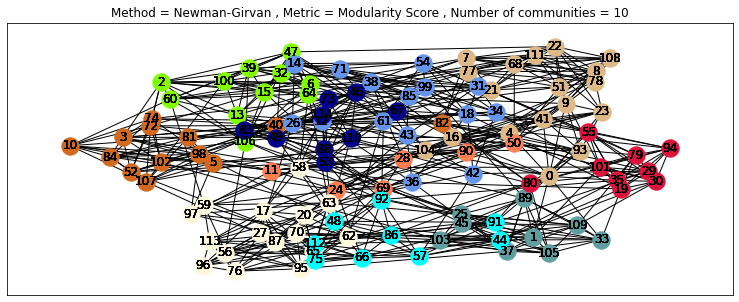

In [67]:
visualization(nfootball, footbal_NG_ms, "Newman-Girvan", "Modularity Score")

* Performance score

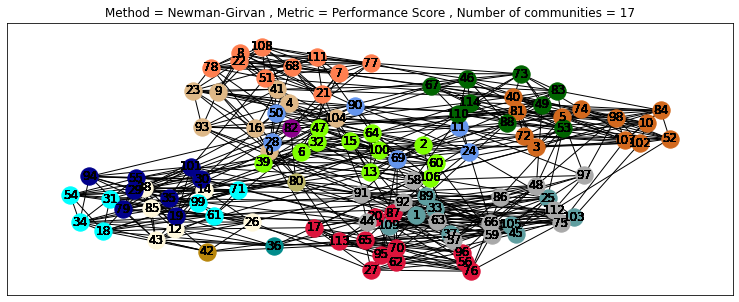

In [68]:
visualization(nfootball, football_NG_ps, "Newman-Girvan", "Performance Score")

##### Spectral Clustering method

* Modularity score

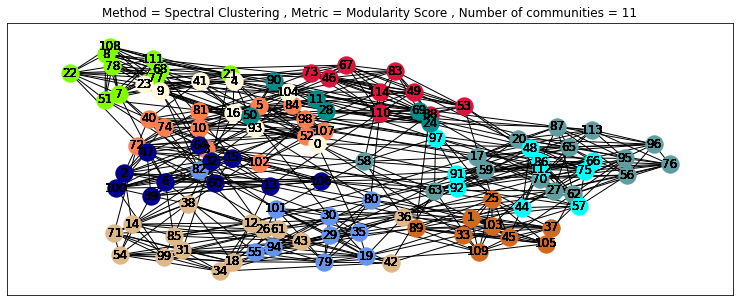

In [69]:
visualization(nfootball, football_SC_ms, "Spectral Clustering", "Modularity Score")

* Performance score

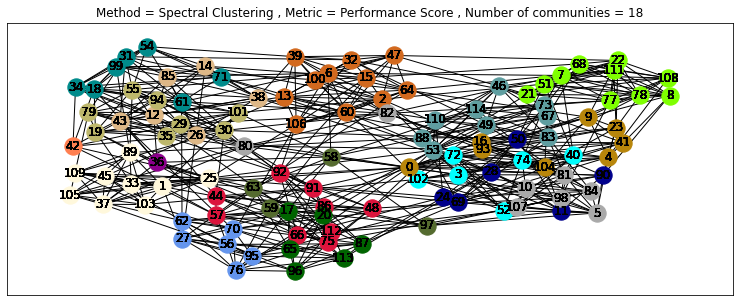

In [70]:
visualization(nfootball, football_SC_ps, "Spectral Clustering", "Performance Score")

##### Modularity Maximization method

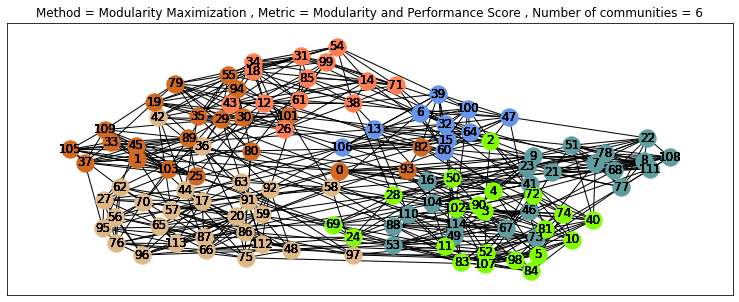

In [71]:
visualization(nfootball, football_MM, "Modularity Maximization", "Modularity and Performance Score")

##### Σχολιασμός

Με βάσει τις παραπάνω οπτικοποιήσεις παρατηρούμε ότι σε κάθε περίπτωση οι κοινότητες δεν έχουν κάποια συγκεκριμένη δομή αλλά είναι διασκορπισμένες κατα μήκος του γράφου και παρεμβάλλονται η μια της άλλης.

#### Οπτικοποίηση κοινοτήτων Game of Thrones

Οι κοινότητες αυτού του δικτύου αναφέρονται σε άτομα που ανήκουν σε διαφορετικές περιοχές του σύμπαντος του game of thrones (πχ Winterfell, Braavos κλπ).

##### Newman-Girvan method

* Modularity score

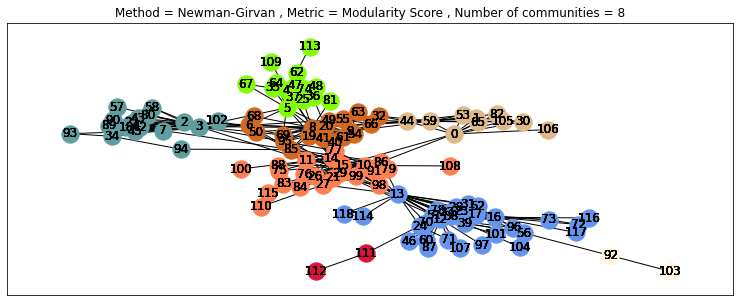

In [72]:
visualization(ngot, got_NG_ms, "Newman-Girvan", "Modularity Score")

* Performance score

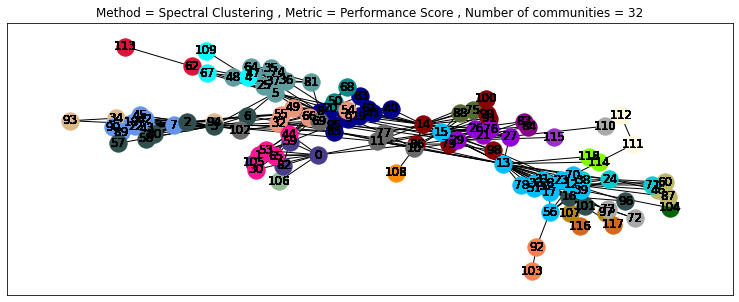

In [73]:
visualization(ngot, got_SC_ps, "Spectral Clustering", "Performance Score")

##### Spectral Clustering method

* Modularity score

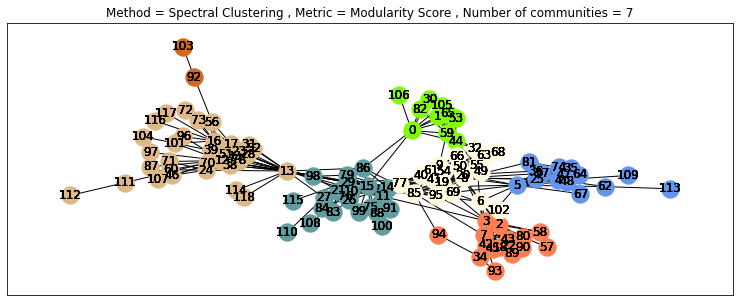

In [74]:
visualization(ngot, got_SC_ms, "Spectral Clustering", "Modularity Score")

* Performance score

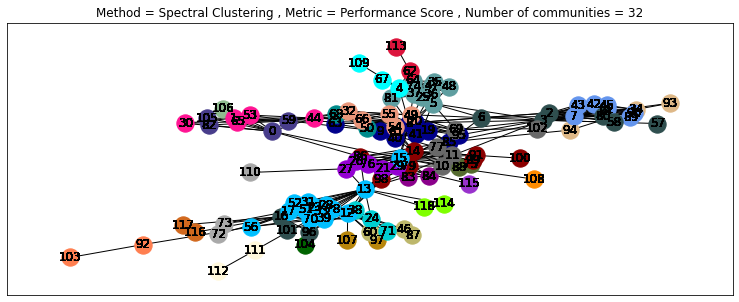

In [75]:
visualization(ngot, got_SC_ps, "Spectral Clustering", "Performance Score")

##### Modularity Maximization method

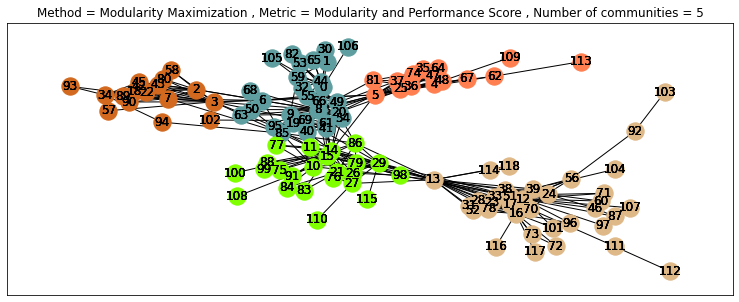

In [76]:
visualization(ngot, got_MM, "Modularity Maximization", "Modularity and Performance Score")

##### Σχολιασμός

Με βάση τις παραπάνω οπτικοποιήσεις παρατηρούμε ότι είναι πιο εμφανώς διαχωρισμένες οι κοινότητες μέσα στον γράφο. Επίσης παρατηρούμε ότι στις περιπτώσεις μεγιστοποίησης performance υπάρχουν περισσότερες κοινότητες με λιγότερους κόμβους, ενώ στις περιπτώσεις μεγιστοποίησης του modularity υπάρχουν λιγότερες κοινότητες με περισσότερους κόμβους. Αντίστοιχα, στο modularity maximization έχουμε λίγες κοινότητες με πολλούς κόμβους.

#### Οπτικοποίηση κοινοτήτων email-Eu-core (να οπτικοποιηθεί και η ground-truth διαμέριση)

Οι κοινότητες σε αυτό το δίκτυο αναπαριστούν τα διαφορετικά departments που στέλνουν email τα άτομα του ενός στα άτομα του άλλου.

##### Newman-Girvan method

* Modularity score

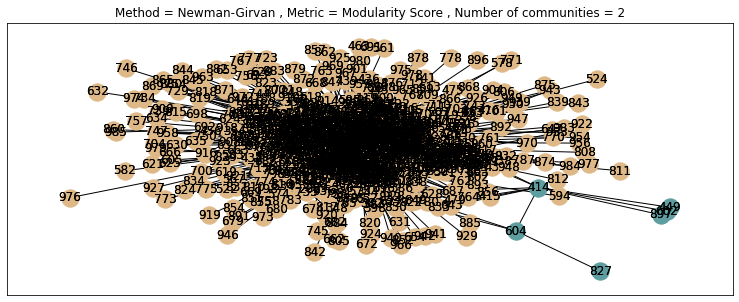

In [77]:
visualization(neu, eu_NG_ms, "Newman-Girvan", "Modularity Score")

* Performance score

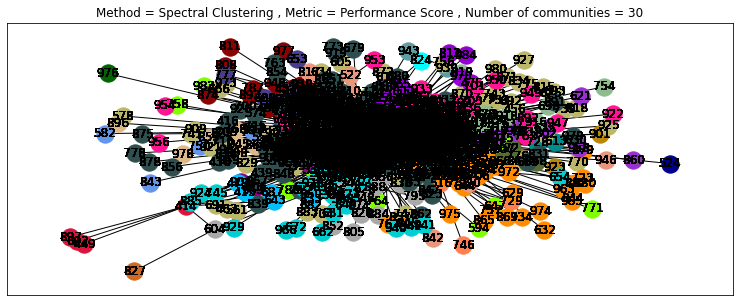

In [78]:
visualization(neu, eu_SC_ps, "Spectral Clustering", "Performance Score")

###### Σύγκριση με την ground-truth διαμέριση

Σχετικά με το αρχείο email-eu-core-department-labels που μας έχουν δώσει, αυτό μας δείχνει σε ποιά από τις 42 κοινότητες ανήκει ο κάθε κόμβος. Προκειμένου να μπορέσουμε να το χρησιμοποιήσουμε χρειάζεται μια προεπεξεργασία. Σε κάθε γραμμή του αρχείου υπάρχουν δύο αριθμοί, ο πρώτος αφορά τον κόμβο και ο δεύτερος την κοινότητα στην οποία ανήκει. 

Σαν πρώτο βήμα θέλουμε να φτιάξουμε μία λίστα από λίστες, όπου κάθε λίστα θα περιέχει τους κόμβους της εκάστοτε κοινότητας, όπως και παραπάνω.

In [106]:
communities = []
#we have 42 communities
for i in range(42):
    communities.append([])

Στην συνέχεια διαβάζουμε το αρχείο και ταξινομούμε κάθε κόμβο στην κοινότητα του.

In [107]:
with open('email-Eu-core-department-labels.txt') as f:
    lines = f.readlines()
    #we split each line to get the first and the second number
    graph_node = [int(line.split()[0]) for line in lines]
    community_label = [int(line.split()[1]) for line in lines]

nodes = []
community = []
j = 0

#We use the dict made from conv2int in order to use the mapping
dict_keys = list(eu_map.keys())
dict_values = list(map(int,eu_map.values()))


#we need to keep the nodes that appear on the biggest connected component
for i in range(len(graph_node)):
  if graph_node[i] in dict_values:
    community.append(community_label[i])
    nodes.append(j)
    j = j + 1

for i in range(986):
   communities[community[i]].append(nodes[i])

In [108]:
print("The communities are :\n",communities)

The communities are :
 [[122, 130, 148, 149, 156, 157, 178, 179, 180, 191, 214, 231, 257, 262, 277, 278, 284, 289, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 402, 511, 575, 620, 652, 662, 672, 673, 674, 682, 700, 764, 795, 805, 820, 832, 838, 852, 884, 888], [0, 1, 17, 18, 73, 74, 85, 120, 177, 215, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 248, 297, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 341, 414, 415, 449, 459, 468, 479, 516, 517, 602, 604, 628, 643, 647, 686, 687, 720, 729, 748, 758, 780, 827, 833, 853, 885, 886, 897, 983], [134, 340, 482, 521, 553, 554, 582, 597, 750, 843], [77, 78, 79, 445, 483, 497, 531, 539, 557, 580, 792, 829], [14, 53, 65, 93, 95, 129, 133, 167, 168, 172, 176, 183, 197, 198, 199, 200, 201, 202, 203, 206, 207, 232, 256, 270, 275, 276, 280, 290, 291, 292, 294, 399, 401, 403, 413, 419, 425, 426, 440, 450, 457, 458, 464, 484, 486, 493, 515, 522, 523, 526, 534, 542, 543, 544, 556, 562, 563, 567, 568, 572, 574, 576, 583, 584,

* Σύγκριση ως προς το πλήθος των παραγόμενων κοινοτήτων:

In [109]:
print("The number of eu-core communities for best modularity are :",len(eu_NG_ms))
print("The number of eu-core communities for best performance are :",len(eu_NG_ps))
print("The number of eu-core communities for ground-truth partition are :",len(communities))

The number of eu-core communities for best modularity are : 2
The number of eu-core communities for best performance are : 50
The number of eu-core communities for ground-truth partition are : 42


* Σύγκριση ως προς το modularity:

In [102]:
print("The best modularity of eu-core is : ",eu_NG_ms_modularity)
print("The best modularity of eu-core ground-truth partition is : ",nx.algorithms.community.quality.modularity(neu, communities))

The best modularity of eu-core is :  0.0006218821799455388
The best modularity of eu-core ground-truth partition is :  0.2880131886237422


* Σύγκριση ως προς το performance:

In [103]:
print("The best performance of eu-core is : ",eu_NG_ps_performance)
print("The best performance of eu-core ground-truth partition is : ",nx.algorithms.community.quality.partition_quality(neu, communities)[1])

The best performance of eu-core is :  0.13940548388093205
The best performance of eu-core ground-truth partition is :  0.9428136036490563


##### Spectral Clustering method

* Modularity score

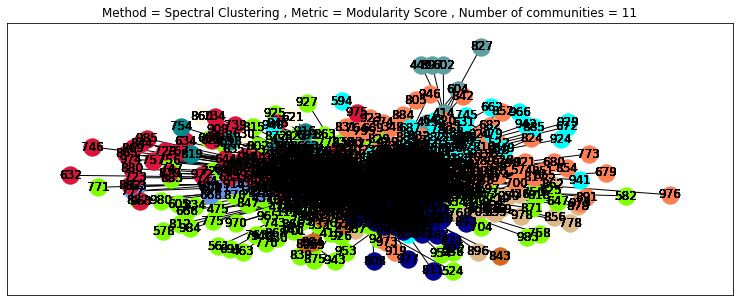

In [110]:
visualization(neu, eu_SC_ms, "Spectral Clustering", "Modularity Score")

* Performance score

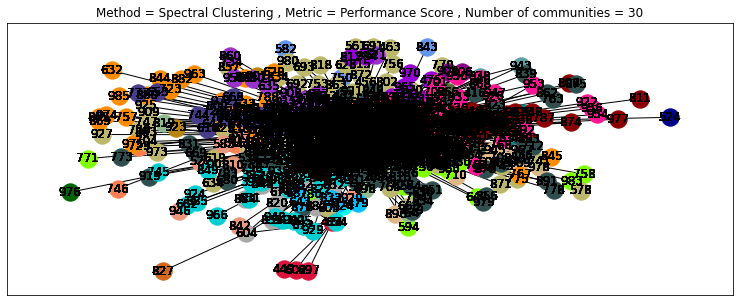

In [111]:
visualization(neu, eu_SC_ps, "Spectral Clustering", "Performance Score")

###### Σύγκριση με την ground-truth διαμέριση

* Σύγκριση ως προς το πλήθος των παραγόμενων κοινοτήτων:

In [112]:
print("The number of eu-core communities for best modularity are :",len(eu_SC_ms))
print("The number of eu-core communities for best performance are :",len(eu_SC_ps))
print("The number of eu-core communities for ground-truth partition are :",len(communities))

The number of eu-core communities for best modularity are : 11
The number of eu-core communities for best performance are : 30
The number of eu-core communities for ground-truth partition are : 42


* Σύγκριση ως προς το modularity:

In [113]:
print("The best modularity of eu-core is : ",eu_SC_ms_modularity)
print("The best modularity of eu-core ground-truth partition is : ",nx.algorithms.community.quality.modularity(neu, communities))

The best modularity of eu-core is :  0.3830767799692663
The best modularity of eu-core ground-truth partition is :  0.2880131886237422


* Σύγκριση ως προς το performance:

In [114]:
print("The best performance of eu-core is : ",eu_SC_ps_performance)
print("The best performance of eu-core ground-truth partition is : ",nx.algorithms.community.quality.partition_quality(neu, communities)[1])

The best performance of eu-core is :  0.8890991649591746
The best performance of eu-core ground-truth partition is :  0.9428136036490563


##### Modularity Maximization method

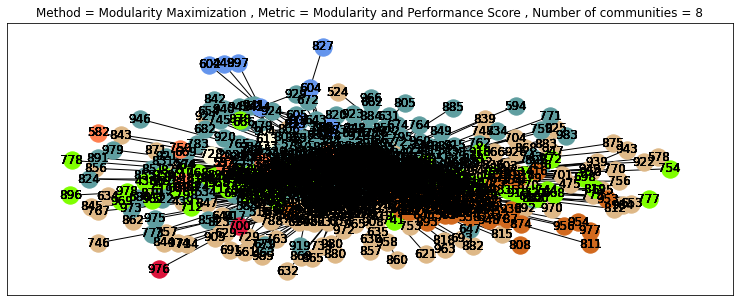

In [115]:
visualization(neu, eu_MM, "Modularity Maximization", "Modularity and Performance Score")

###### Σύγκριση με την ground-truth διαμέριση

* Σύγκριση ως προς το πλήθος των παραγόμενων κοινοτήτων:

In [116]:
print("The number of eu-core communities for best modularity are :",len(eu_MM))
print("The number of eu-core communities for ground-truth partition are :",len(communities))

The number of eu-core communities for best modularity are : 8
The number of eu-core communities for ground-truth partition are : 42


* Σύγκριση ως προς το modularity:

In [117]:
print("The best modularity of eu-core is : ",eu_MM_modularity)
print("The best modularity of eu-core ground-truth partition is : ",nx.algorithms.community.quality.modularity(neu, communities))

The best modularity of eu-core is :  0.3471325650460906
The best modularity of eu-core ground-truth partition is :  0.2880131886237422


* Σύγκριση ως προς το performance:

In [118]:
print("The best performance of eu-core is : ",eu_MM_performance)
print("The best performance of eu-core ground-truth partition is : ",nx.algorithms.community.quality.partition_quality(neu, communities)[1])

The best performance of eu-core is :  0.7078716240565892
The best performance of eu-core ground-truth partition is :  0.9428136036490563


##### Σχολιασμός

Βλέπουμε πάλι ότι στις περιπτώσεις μεγιστοποίησης του Modularity έχουμε λίγες κοινότητες με πολλούς κόμβους και το αντίθετο για τις περιπτώσεις μεγιστοποίησης του performance. Όσον αφορά την σύγκριση με την ground truth διαμέριση, βλέπουμε ότι με όλες τις μεθόδους προκύπτει αριθμός κοινοτήτων μικρότερος από αυτόν της ground truth διαμέρισης. Ακόμα, όσον αφορά το best modularity, αυτό είναι κατά πολύ μικρότερο από το modularity της ground truth διαμέρισης στην μέθοδο newman girven αλλά μεγαλύτερο στις άλλες δύο μεθόδους. Το best performance ωστόσο είναι μικρότερο από το performance του ground truth σε όλες τις μεθόδους.

#### Οπτικοποίηση κοινοτήτων REG

*Σημείωση* : για τις συνθετικές τοπολογίες έχουμε αναλύσει ήδη τις συγκρίσεις περί modularity, performance, communities και time επομένως από εδώ και στο εξής αναφερόμαστε μόνο στα οπτικά συμπεράσματα που προκύπτουν.

##### Newman-Girvan method

* Modularity score

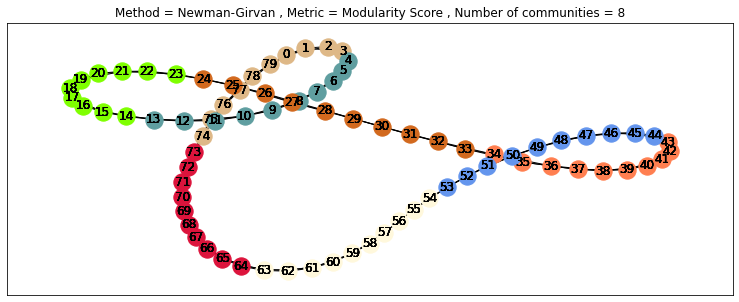

In [119]:
visualization(REG, REG_NG_ms, "Newman-Girvan", "Modularity Score")

* Performance score

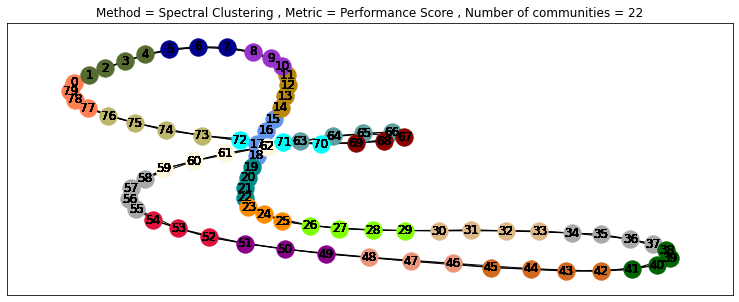

In [120]:
visualization(REG, REG_SC_ps, "Spectral Clustering", "Performance Score")

##### Spectral Clustering method

* Modularity score

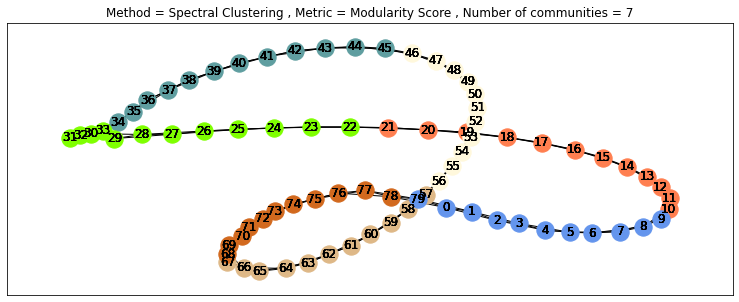

In [121]:
visualization(REG, REG_SC_ms, "Spectral Clustering", "Modularity Score")

* Performance score

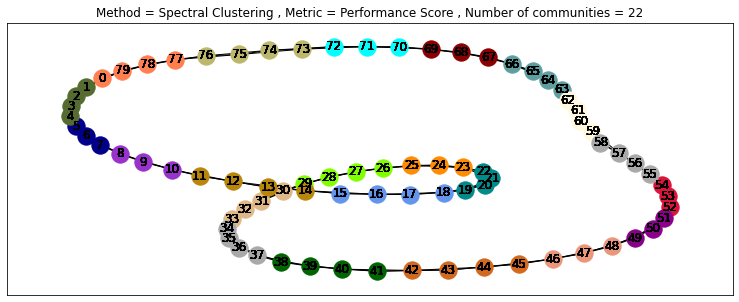

In [122]:
visualization(REG, REG_SC_ps, "Spectral Clustering", "Performance Score")

##### Modularity Maximization method

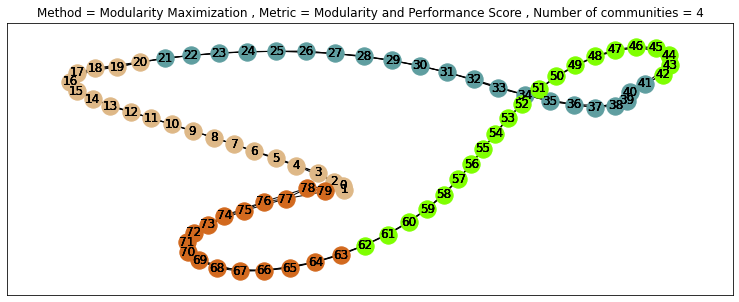

In [123]:
visualization(REG, REG_MM, "Modularity Maximization", "Modularity and Performance Score")

##### Σχολιασμός

Στην περίπτωση του γράφου REG βλέπουμε ότι σε κάθε περίπτωση ο γράφος χωρίζεται σε κοινότητες με ίδιο πλήθος κόμβων(πέρα από την περίπτωση του spectral clustering κατά την μεγιστοποίηση του performance score όπου ο γράφος χωρίζεται σε τριάδες και τετράδες), κάτι το οποίο αναμέναμε αφού κάθε κόμβος συνδέεται με δύο μόνο γειτονικούς κόμβους.

#### Οπτικοποίηση κοινοτήτων RGER

##### Newman-Girvan method

* Modularity score

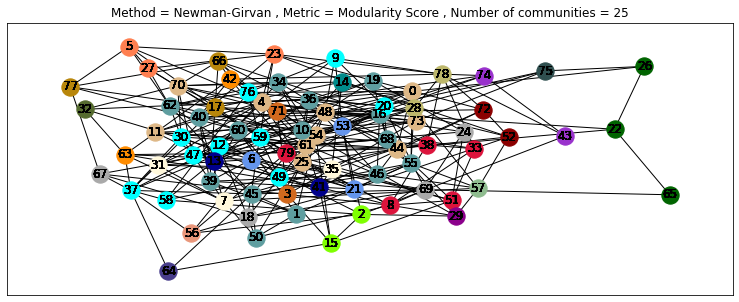

In [124]:
visualization(RGER, RGER_NG_ms, "Newman-Girvan", "Modularity Score")

* Performance score

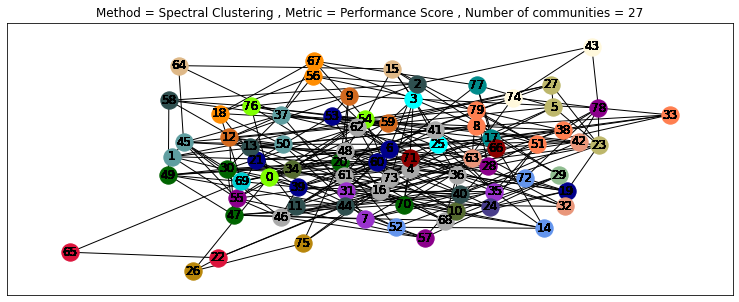

In [125]:
visualization(RGER, RGER_SC_ps, "Spectral Clustering", "Performance Score")

##### Spectral Clustering method

* Modularity score

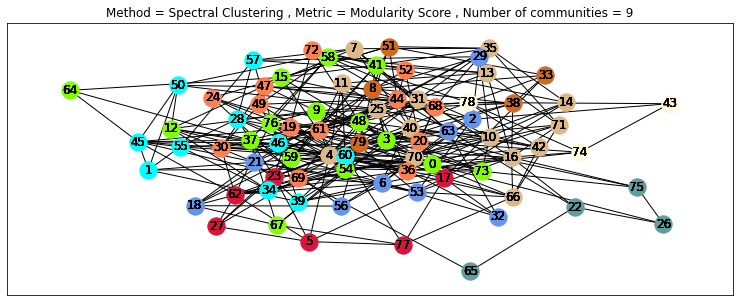

In [126]:
visualization(RGER, RGER_SC_ms, "Spectral Clustering", "Modularity Score")

* Performance score

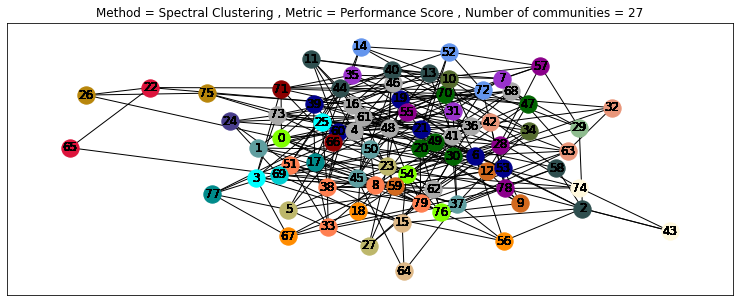

In [127]:
visualization(RGER, RGER_SC_ps, "Spectral Clustering", "Performance Score")

##### Modularity Maximization method

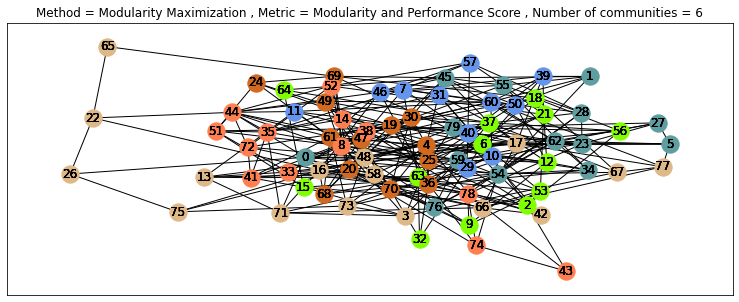

In [128]:
visualization(RGER, RGER_MM, "Modularity Maximization", "Modularity and Performance Score")

##### Σχολιασμός

Για τον τυχαίο γράφο βλέοουμε ότι οι κοινότητες δεν έχουν κάποιο διακριτό σχεδιασμό, το οποίο είναι λογικό λόγω της τυχαιότητας του.

#### Οπτικοποίηση κοινοτήτων RGG

##### Newman-Girvan method

* Modularity score

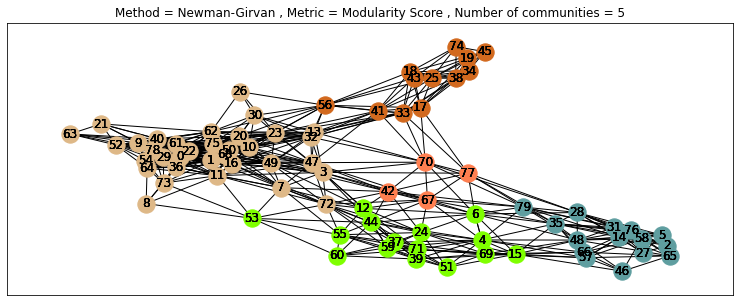

In [129]:
visualization(RGG, RGG_NG_ms, "Newman-Girvan", "Modularity Score")

* Performance score

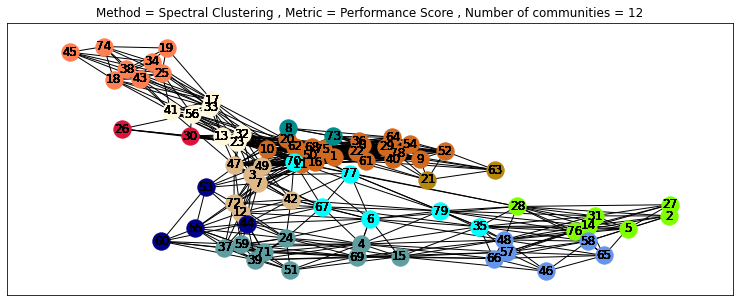

In [130]:
visualization(RGG, RGG_SC_ps, "Spectral Clustering", "Performance Score")

##### Spectral Clustering method

* Modularity score

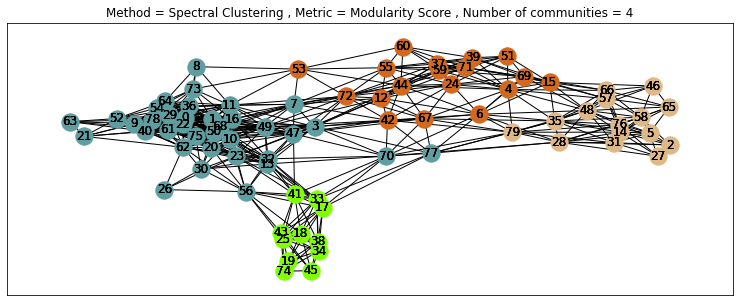

In [131]:
visualization(RGG, RGG_SC_ms, "Spectral Clustering", "Modularity Score")

* Performance score

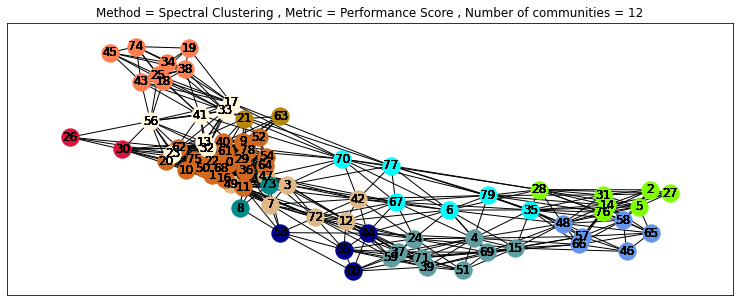

In [132]:
visualization(RGG, RGG_SC_ps, "Spectral Clustering", "Performance Score")

##### Modularity Maximization method

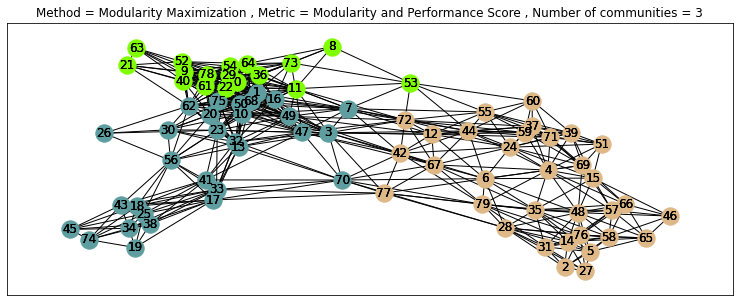

In [133]:
visualization(RGG, RGG_MM, "Modularity Maximization", "Modularity and Performance Score")

##### Σχολιασμός

Όσον αφορά τον τυχαίο γεωμετρικό γράφο παρατηρούμε ότι δημιουργούνται κοινότητεες γύρω από κάθε κόμβο με βάσει τις αποστάσεις του κόμβου από τους υπόλοιπους στο δίκτυο. Αυτό οφείλεται στον τρόπο δημιουργίας του γράφου μιας και δύο κόμβοι συνδέονται με ακμή αν η απόσταση μεταξύ τους είναι μικρότερη ή ίση της δεδομένης ακτίνας του.

#### Οπτικοποίηση κοινοτήτων SW

##### Newman-Girvan method

* Modularity score

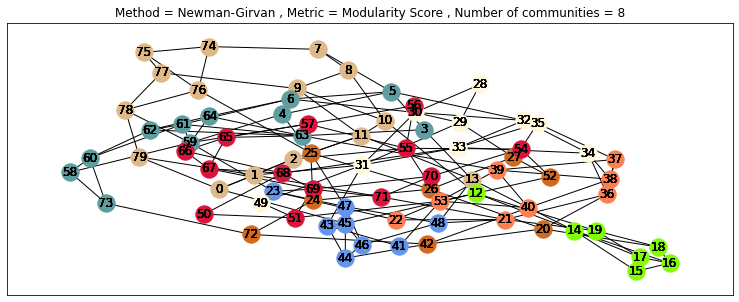

In [134]:
visualization(SW, SW_NG_ms, "Newman-Girvan", "Modularity Score")

* Performance score

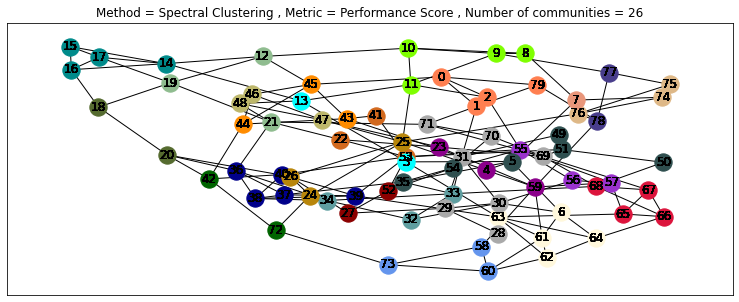

In [135]:
visualization(SW, SW_SC_ps, "Spectral Clustering", "Performance Score")

##### Spectral Clustering method

* Modularity score

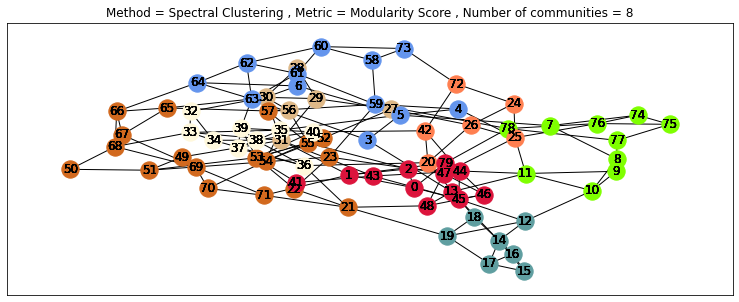

In [136]:
visualization(SW, SW_SC_ms, "Spectral Clustering", "Modularity Score")

* Performance score

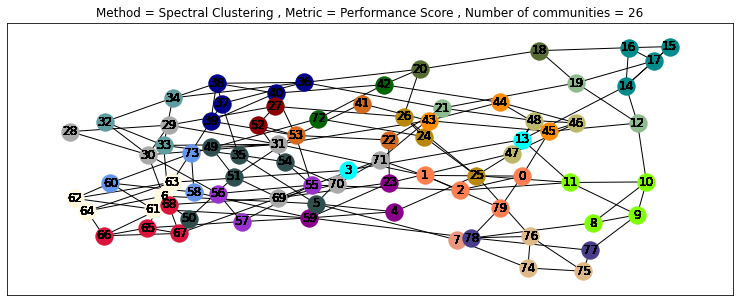

In [137]:
visualization(SW, SW_SC_ps, "Spectral Clustering", "Performance Score")

##### Modularity Maximization method

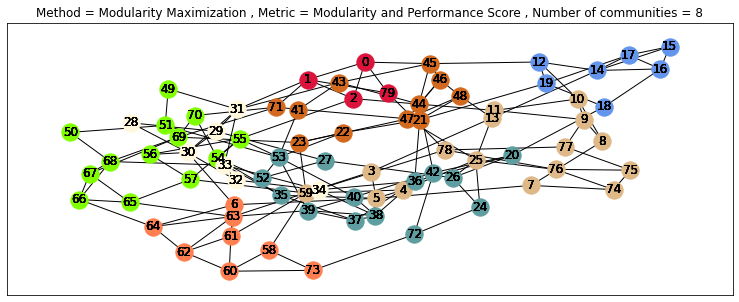

In [138]:
visualization(SW, SW_MM, "Modularity Maximization", "Modularity and Performance Score")

##### Σχολιασμός

Αναφορικά με το δίκτυο small world, βλέπουμε ότι ειδικά στις περιπτώσεις μεγιστοποίησης του modularity score οι κοινότητες διακρίνονται εύκολα. Όπως γνωρίζουμε, η κατασκευή της τοπολογίας αυτής ορίζεται ως εξής: αρχικά δημιουργείται ένας δακτύλιος n κόμβων, μετά κάθε κόμβος ενώνεται με τους k γειτονικούς του (εδώ k = 4) και στην συνέχεια δημιουργούνται shortcuts αντικαθιστώντας μερικές ακμές με βάση την πιθανότητα rewiring p.



#### Οπτικοποίηση κοινοτήτων SF

##### Newman-Girvan method

* Modularity score

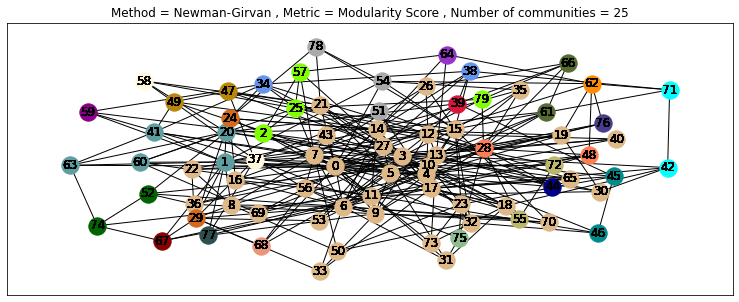

In [139]:
visualization(SF, SF_NG_ms, "Newman-Girvan", "Modularity Score")

* Performance score

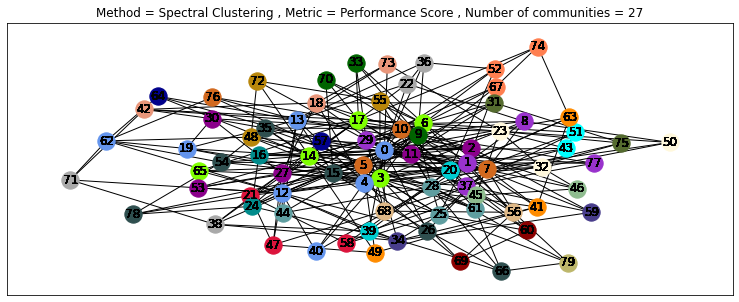

In [140]:
visualization(SF, SF_SC_ps, "Spectral Clustering", "Performance Score")

##### Spectral Clustering method

* Modularity score

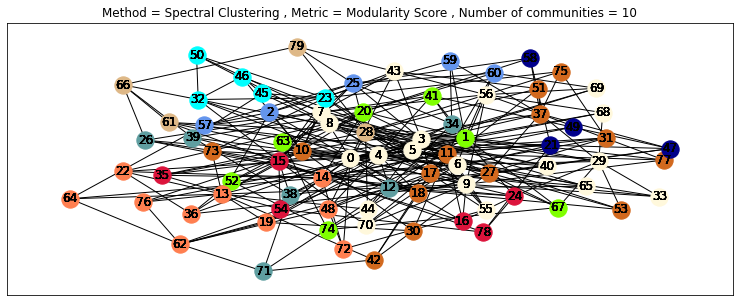

In [141]:
visualization(SF, SF_SC_ms, "Spectral Clustering", "Modularity Score")

* Performance score

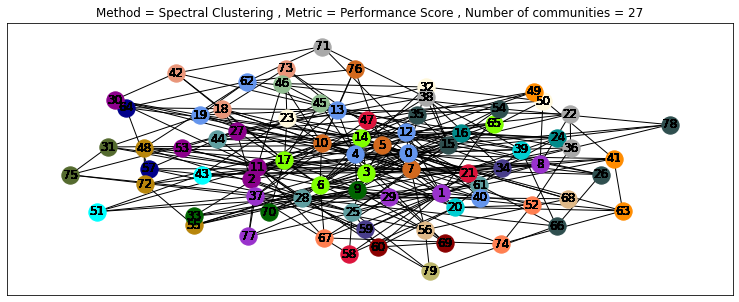

In [142]:
visualization(SF, SF_SC_ps, "Spectral Clustering", "Performance Score")

##### Modularity Maximization method

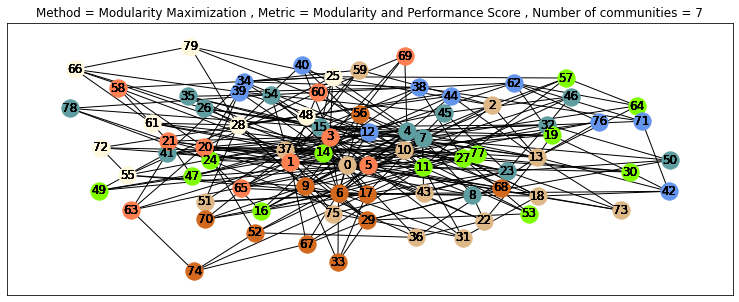

In [143]:
visualization(SF, SF_MM, "Modularity Maximization", "Modularity and Performance Score")

##### Σχολιασμός

Όσον αφορά το scale free network, δεδομένου ότι κατά την δημιουργία του ξεκινάμε από έναν γράφο με n κόμβους και τον επεκτείνουμε προτιμώντας να συνδέσουμε νέους κόμβους με m ακμές σε κόμβους με μεγάλο βαθμό. Γι'αυτό τον λόγο συμπεραίνουμε ότι οι κοινότητες που βλέπουμε να έχουν σχηματιστεί έχουν σαν κέντρο κάποιο κόμβο με μεγάλο βαθμό.

# Βιβλιογραφία

1. [Spectral clustering](https://www.geeksforgeeks.org/ml-spectral-clustering/)
2. [Modularity Maximization](https://towardsdatascience.com/modularity-maximization-5cfa6495b286)
3. [Community Detection in graphs](https://arxiv.org/abs/0906.0612)
4. [Genetic Algorithm with Ensemble Learning for Detecting Community Structure 
in Complex Networks ](https://arxiv.org/ftp/arxiv/papers/1303/1303.5673.pdf)
5. [An Analysis of Email-Eu-Core Network](https://www.researchgate.net/publication/330163019_An_Analysis_of_Email-Eu-Core_Network)
6. [Game Of Thrones network](https://networkofthrones.wordpress.com/the-series/season-5/)